# Day 3: Exploratory Data Analysis (EDA) Best Practices

**Welcome to Day 3 of your ML journey!** Today we'll master the art of Exploratory Data Analysis - understanding your data deeply before building models. We'll explore feature distributions, relationships, patterns, and anomalies using modern visualization techniques.

**Learning Objectives:**
- Understand the critical role of EDA in the ML pipeline
- Master univariate, bivariate, and multivariate analysis techniques
- Create professional, publication-quality visualizations
- Identify patterns, correlations, and anomalies in real-world data
- Apply systematic EDA workflows to any dataset

---


## Concept Overview

### What is Exploratory Data Analysis (EDA)?

**Exploratory Data Analysis** is the critical first step in any machine learning project. It's the process of investigating your data to discover patterns, spot anomalies, test hypotheses, and check assumptions through summary statistics and graphical representations.

**Think of EDA as your data detective work** - you're gathering evidence about what your data can and cannot tell you before investing time in model building.

### Why EDA Matters

**1. Prevents Costly Mistakes**
- Identifies data quality issues early (missing values, outliers, inconsistencies)
- Reveals distribution problems that could break model assumptions
- Catches data collection errors before they poison your model

**2. Guides Feature Engineering**
- Discovers which features are actually informative
- Reveals feature relationships and redundancies
- Identifies transformation needs (log, square root, etc.)

**3. Informs Model Selection**
- Linear relationships → Linear models might work well
- Non-linear patterns → Consider tree-based or neural networks
- High multicollinearity → Regularization or dimensionality reduction needed

**4. Sets Realistic Expectations**
- Shows if the data can actually answer your question
- Reveals the signal-to-noise ratio
- Identifies if you need more data or better features

### The EDA Framework

We'll follow a systematic approach:

**1. Univariate Analysis** - Examine each feature individually
   - Distribution shape, central tendency, spread
   - Outliers and anomalies
   - Missing value patterns

**2. Bivariate Analysis** - Explore relationships between pairs of features
   - Feature-target correlations
   - Scatter plots and trend identification
   - Categorical comparisons

**3. Multivariate Analysis** - Understand complex interactions
   - Correlation matrices
   - Feature interactions
   - Dimensionality reduction visualization

**4. Hypothesis Generation** - Form data-driven insights
   - Pattern identification
   - Anomaly investigation
   - Business insight extraction

### Real-World Examples

**E-Commerce Analytics**
- **Discovery**: Customer purchase amounts spike every Friday evening
- **Action**: Schedule targeted marketing campaigns for Friday afternoons
- **Impact**: 23% increase in conversion rates

**Healthcare Predictions**
- **Discovery**: Missing lab results correlate with urgent care visits
- **Action**: Treat missing values as a separate informative category
- **Impact**: Model accuracy improves from 72% to 84%

**Credit Risk Assessment**
- **Discovery**: Income and loan amount are highly correlated
- **Action**: Create debt-to-income ratio feature, remove redundancy
- **Impact**: Model becomes more interpretable and generalizes better

---


## Code Demo

Let's perform comprehensive EDA on a realistic dataset. We'll use best practices and modern visualization techniques throughout.


In [24]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles for professional-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")
sns.set_context("notebook", font_scale=1.1)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("Libraries loaded successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Libraries loaded successfully!
Pandas version: 2.2.2
NumPy version: 1.26.4


### 1. Loading and Initial Data Assessment

First, let's create a realistic dataset that mimics real-world scenarios with various feature types and relationships.


In [25]:
# Create a realistic customer dataset for analysis
np.random.seed(42)
n_samples = 1000

# Generate realistic customer data
data = {
    'customer_id': range(1, n_samples + 1),
    'age': np.random.normal(40, 15, n_samples).clip(18, 80),
    'income': np.random.lognormal(10.5, 0.6, n_samples),
    'credit_score': np.random.normal(700, 80, n_samples).clip(300, 850),
    'account_balance': np.random.exponential(5000, n_samples),
    'num_products': np.random.poisson(2, n_samples),
    'tenure_months': np.random.gamma(3, 15, n_samples).clip(0, 120),
    'region': np.random.choice(['North', 'South', 'East', 'West'], n_samples, p=[0.3, 0.25, 0.25, 0.2]),
    'customer_type': np.random.choice(['Premium', 'Standard', 'Basic'], n_samples, p=[0.15, 0.6, 0.25]),
    'is_active': np.random.choice([0, 1], n_samples, p=[0.3, 0.7])
}

df = pd.DataFrame(data)

# Create target variable (churn) with realistic dependencies
churn_probability = (
    0.1 +  # Base probability
    0.3 * (df['age'] < 25).astype(int) +  # Young customers churn more
    0.2 * (df['num_products'] == 0).astype(int) +  # No products → higher churn
    0.25 * (df['tenure_months'] < 6).astype(int) +  # New customers churn more
    0.15 * (df['is_active'] == 0).astype(int) -  # Inactive → higher churn
    0.2 * (df['customer_type'] == 'Premium').astype(int)  # Premium → lower churn
)
churn_probability = churn_probability.clip(0, 0.9)
df['churned'] = (np.random.random(n_samples) < churn_probability).astype(int)

# Introduce some realistic missing values
missing_mask = np.random.random(n_samples) < 0.08
df.loc[missing_mask, 'credit_score'] = np.nan

missing_mask = np.random.random(n_samples) < 0.05
df.loc[missing_mask, 'income'] = np.nan

print("Dataset created successfully!")
print(f"\nShape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
df.head(10)


Dataset created successfully!

Shape: (1000, 11)
Memory usage: 165.70 KB


,customer_id,age,income,credit_score,account_balance,num_products,tenure_months,region,customer_type,is_active,churned
0,1,47.45,84087.51,645.99,8539.12,3,22.27,East,Basic,1,0
1,2,37.93,63245.56,688.44,20542.38,0,72.12,North,Basic,1,0
2,3,49.72,37638.33,636.61,1503.30,3,24.09,North,Premium,1,0
3,4,62.85,24632.89,675.36,17486.94,1,50.20,East,Premium,1,0
4,5,36.49,NaN,548.51,2821.43,6,22.65,East,Premium,1,0
5,6,36.49,45985.95,717.06,2134.86,1,65.77,East,Standard,1,0
6,7,63.69,62138.18,700.10,258.31,2,52.43,South,Standard,1,0
7,8,51.51,53162.21,634.63,271.04,1,16.77,West,Standard,1,0
8,9,32.96,68168.08,752.74,5888.46,1,68.08,West,Standard,1,0
9,10,48.14,26340.39,775.01,3061.79,4,79.93,West,Basic,1,0


### Understanding the Code: Step-by-Step Breakdown

I know what you're thinking right now: *"Whoa, that's a lot of code! And what's with all these random distributions and probability calculations? This looks way more complex than I expected!"* 

Don't worry - you're not alone! Every data scientist has been exactly where you are right now. That code block might look intimidating, but here's the thing: **it's actually much simpler than it appears**. Think of it like a recipe - once you understand each ingredient and step, you'll see it's just a clever way to create realistic data that mimics what you'd find in the real world.

Let's break down what this code is doing and why each step matters for our EDA journey. By the end, you'll not only understand it, but you'll be able to create similar datasets yourself!

#### **Step-by-Step Code Explanation**

**1. Setting Up the Foundation**
```python
np.random.seed(42)
n_samples = 1000
```
- **`np.random.seed(42)`**: Ensures reproducible results by fixing the random number generator
- **`n_samples = 1000`**: Defines our dataset size - large enough for meaningful analysis, small enough to run quickly

**2. Creating Realistic Customer Data**
The code generates 11 different features that represent typical customer attributes:

- **`customer_id`**: Unique identifier for each customer
- **`age`**: Customer age (normally distributed, clipped between 18-80)
- **`income`**: Annual income (log-normal distribution - realistic for income data)
- **`credit_score`**: Credit score (normally distributed, clipped between 300-850)
- **`account_balance`**: Bank account balance (exponential distribution - many small, few large)
- **`num_products`**: Number of products owned (Poisson distribution - count data)
- **`tenure_months`**: Customer tenure (gamma distribution - realistic for customer lifetime)
- **`region`**: Geographic region (categorical with weighted probabilities)
- **`customer_type`**: Customer tier (categorical with business-relevant proportions)
- **`is_active`**: Active status (binary with 70% active customers)

#### **Key Functions and Methods Used**

**Distribution Functions:**
- **`np.random.normal()`**: Creates bell-curve distributions (age, credit_score)
- **`np.random.lognormal()`**: Creates right-skewed distributions (income - realistic for earnings)
- **`np.random.exponential()`**: Creates distributions with many small values (account_balance)
- **`np.random.poisson()`**: Creates count distributions (num_products)
- **`np.random.gamma()`**: Creates flexible distributions (tenure_months)

**Data Manipulation:**
- **`.clip()`**: Ensures values stay within realistic bounds
- **`pd.DataFrame()`**: Converts dictionary to structured DataFrame
- **`np.random.choice()`**: Selects categorical values with specified probabilities

---

### **Churn Probability: The Heart of Customer Analytics**

#### **What is Churn Probability?**

**Churn probability** is the likelihood that a customer will stop using your service or product within a given time period. In our context, it's the probability that a customer will "churn" (leave) based on their characteristics.

#### **Why Churn Probability Matters**

**Business Impact:**
- **Cost of Acquisition**: It costs 5-25x more to acquire a new customer than retain an existing one
- **Revenue Protection**: Preventing churn directly protects revenue streams
- **Customer Lifetime Value**: Understanding churn helps predict long-term customer value
- **Resource Allocation**: Helps focus retention efforts on high-risk customers

**ML Applications:**
- **Predictive Modeling**: Build models to identify customers likely to churn
- **Intervention Strategies**: Target specific customer segments for retention campaigns
- **Feature Engineering**: Churn probability becomes a powerful feature for other models
- **Business Intelligence**: Provides actionable insights for strategic decisions

#### **How Our Churn Probability Works**

Our code creates a realistic churn probability using business logic:

```python
churn_probability = (
    0.1 +  # Base probability (10% baseline churn rate)
    0.3 * (df['age'] < 25).astype(int) +  # Young customers churn more
    0.2 * (df['num_products'] == 0).astype(int) +  # No products → higher churn
    0.25 * (df['tenure_months'] < 6).astype(int) +  # New customers churn more
    0.15 * (df['is_active'] == 0).astype(int) -  # Inactive → higher churn
    0.2 * (df['customer_type'] == 'Premium').astype(int)  # Premium → lower churn
)
```

**Business Logic Behind Each Factor:**
- **Young customers (age < 25)**: +30% churn risk (less brand loyalty, more price-sensitive)
- **No products**: +20% churn risk (not engaged with the company)
- **New customers (tenure < 6 months)**: +25% churn risk (still in trial period)
- **Inactive customers**: +15% churn risk (already disengaged)
- **Premium customers**: -20% churn risk (higher satisfaction, better service)

---

### **Missing Mask: Handling Real-World Data Imperfections**

#### **What is a Missing Mask?**

A **missing mask** is a boolean array that identifies which values in your dataset are missing (NaN, None, or empty). It's like a "map" that shows exactly where your data has gaps.

#### **How Missing Masks Work**

**The Process:**
1. **Generate random probabilities** for each data point
2. **Compare against a threshold** (e.g., 8% for credit_score, 5% for income)
3. **Create boolean mask** (True = missing, False = present)
4. **Apply mask to data** to introduce realistic missing values

```python
missing_mask = np.random.random(n_samples) < 0.08
df.loc[missing_mask, 'credit_score'] = np.nan
```

**What This Does:**
- **`np.random.random(n_samples)`**: Creates random numbers between 0 and 1
- **`< 0.08`**: Creates True/False mask where 8% of values are True
- **`df.loc[missing_mask, 'credit_score']`**: Selects specific rows and column
- **`= np.nan`**: Sets those values to "Not a Number" (missing)

#### **Why We Use Missing Masks Before Analysis**

**1. Realistic Data Simulation**
- Real-world data always has missing values
- Different features have different missing rates
- Missing patterns can be informative (not random)

**2. Testing Robustness**
- Ensures our analysis methods handle missing data
- Tests preprocessing pipelines
- Validates model performance under data quality issues

**3. Business Reality**
- Credit scores might be missing for new customers
- Income data might be unavailable for privacy reasons
- Some customers might not provide certain information

**4. Method Validation**
- Tests imputation strategies
- Validates statistical methods that handle missing data
- Ensures visualizations work with incomplete data

#### **Intuition for Beginners**

Think of missing data like a puzzle with some pieces missing:
- **Complete puzzle**: Easy to see the full picture
- **Missing pieces**: Harder to understand, but you can still work with what you have
- **Missing mask**: Shows you exactly which pieces are missing
- **Analysis**: Teaches you to work with incomplete information (like real life!)

**Key Takeaway**: Missing data is not a bug - it's a feature of real-world datasets. Learning to handle it properly is essential for any data scientist.

---


In [26]:
# Quick data overview
print("="*50)
print("\t\tDATASET OVERVIEW")
print("="*50)

print(f"\n{'Total Observations:':<30} {len(df):,}")
print(f"{'Total Features:':<30} {df.shape[1]}")
print(f"{'Target Variable:':<30} churned")
print(f"{'Churn Rate:':<30} {df['churned'].mean():.2%}")

print("\n" + "="*50)
print("\t\tFEATURE TYPES")
print("="*50)
print(df.dtypes)

print("\n" + "="*50)
print("\t\tDATA QUALITY SUMMARY")
print("="*50)

# Missing values analysis
missing_df = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("\nFeatures with missing values:")
    print(missing_df)
else:
    print("\nNo missing values detected!")

# Duplicate check
duplicates = df.duplicated().sum()
print(f"\n{'Duplicate Rows:':<30} {duplicates}")

print("\n" + "="*70)
print("\t\t\tBASIC STATISTICS")
print("="*70)
df.describe()


		DATASET OVERVIEW

Total Observations:            1,000
Total Features:                11
Target Variable:               churned
Churn Rate:                    21.30%

		FEATURE TYPES
customer_id          int64
age                float64
income             float64
credit_score       float64
account_balance    float64
num_products         int32
tenure_months      float64
region              object
customer_type       object
is_active            int32
churned              int32
dtype: object

		DATA QUALITY SUMMARY



Features with missing values:
              Missing_Count  Missing_Percentage
credit_score             79                 7.9
income                   64                 6.4

Duplicate Rows:                0

			BASIC STATISTICS


,customer_id,age,income,credit_score,account_balance,num_products,tenure_months,is_active,churned
count,1000.00,1000.00,936.00,921.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,500.50,40.62,45377.17,699.86,4836.85,1.95,44.60,0.69,0.21
std,288.82,13.92,29588.76,75.53,4879.57,1.32,25.74,0.46,0.41
min,1.00,18.00,6221.50,458.44,0.15,0.00,1.27,0.00,0.00
25%,250.75,30.29,25250.87,649.17,1403.07,1.00,24.87,0.00,0.00
50%,500.50,40.38,37522.23,699.94,3303.87,2.00,39.75,1.00,0.00
75%,750.25,49.72,56130.68,752.74,6550.90,3.00,59.81,1.00,0.00
max,1000.00,80.00,246684.27,850.00,30482.77,8.00,120.00,1.00,1.00


### 2. Univariate Analysis - Understanding Individual Features

Univariate analysis examines each feature in isolation to understand its distribution, central tendency, and spread.


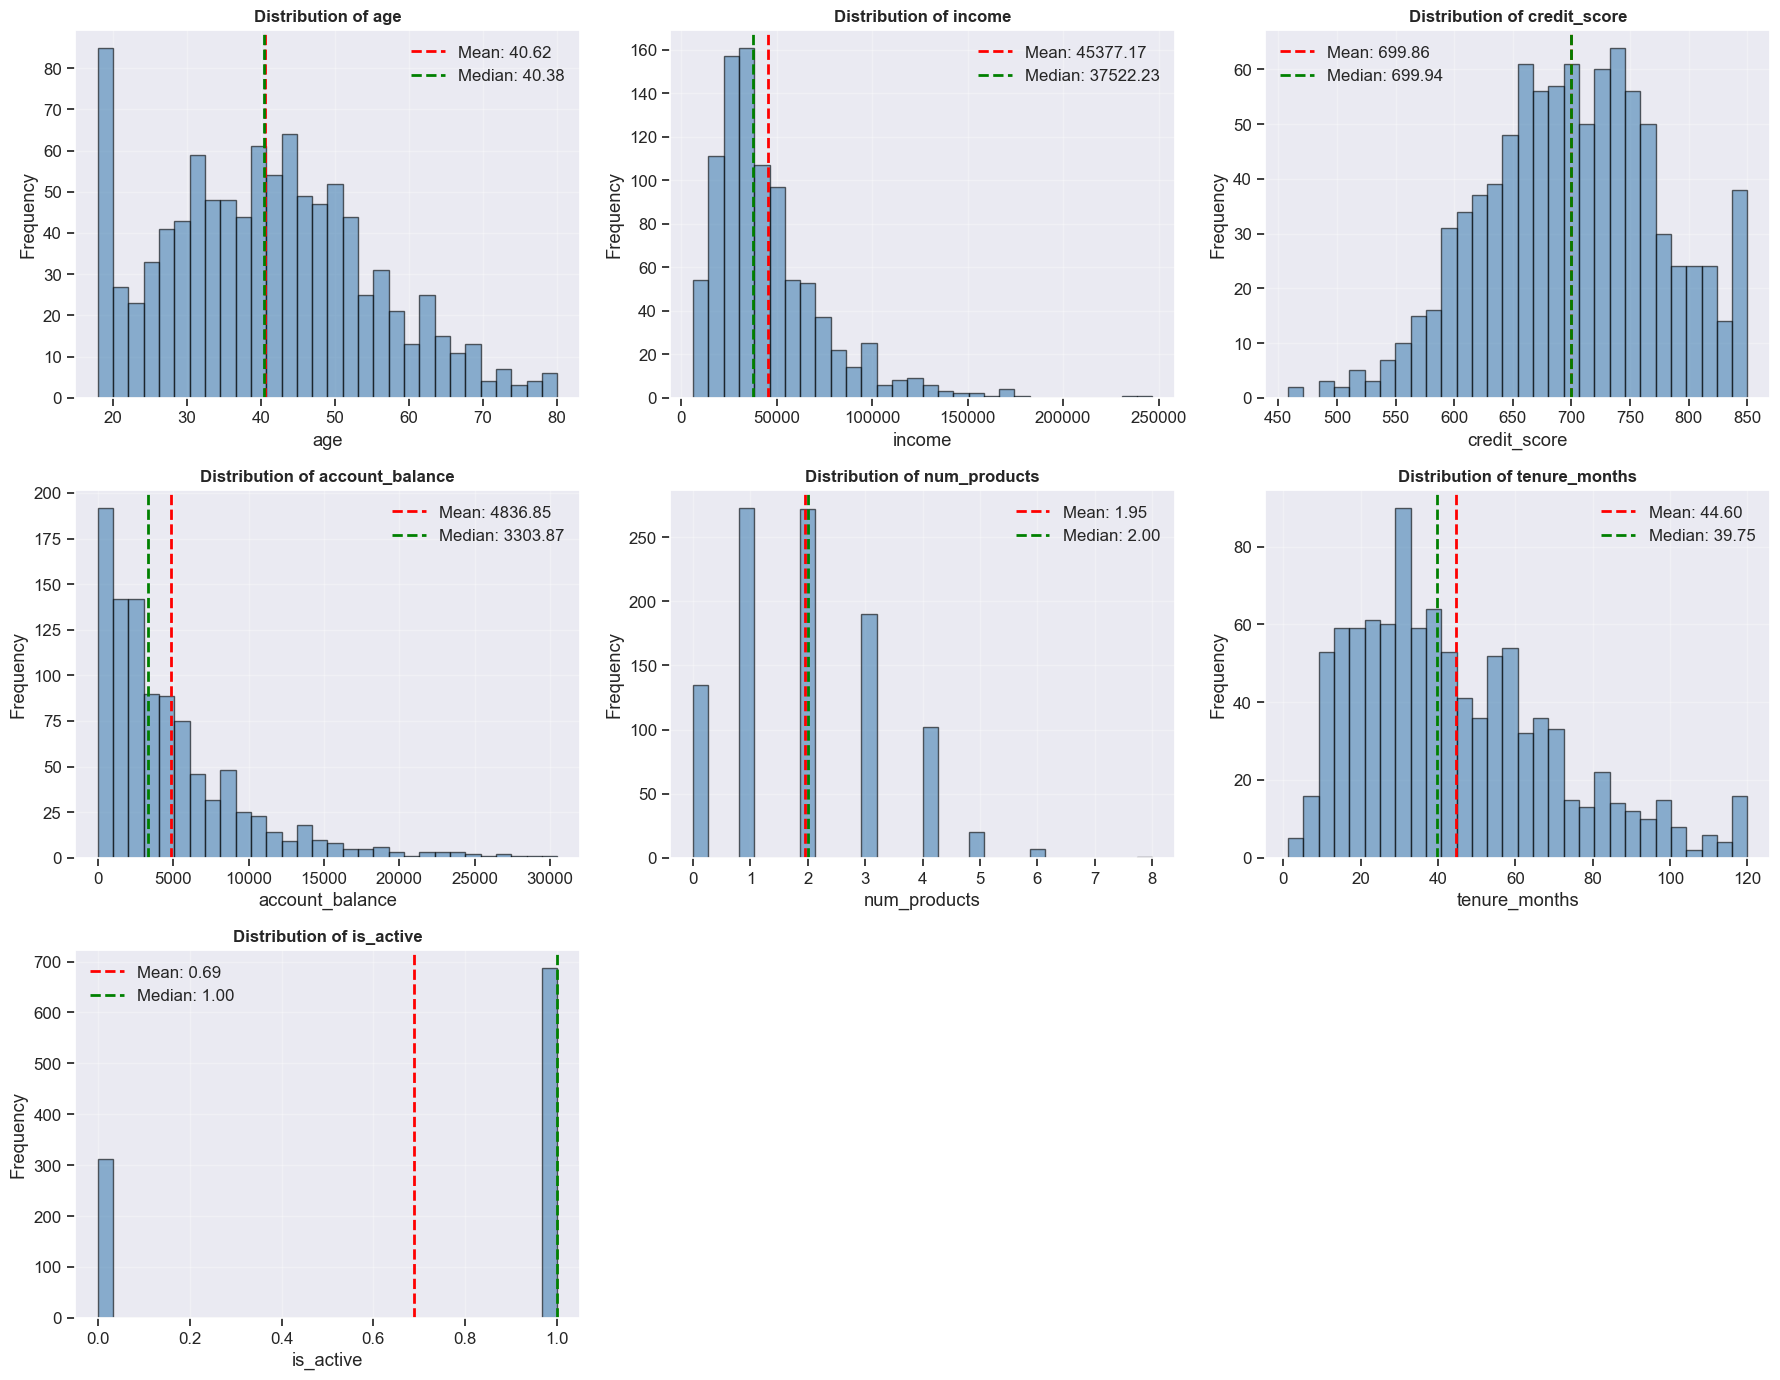


		Detailed Statistical Summary:

AGE
  Mean: 40.62 | Median: 40.38 | Std: 13.92
  Min: 18.00 | Max: 80.00 | Range: 62.00
  Skewness: 0.31 | Kurtosis: -0.39

INCOME
  Mean: 45377.17 | Median: 37522.23 | Std: 29588.76
  Min: 6221.50 | Max: 246684.27 | Range: 240462.77
  Skewness: 1.99 | Kurtosis: 6.36

CREDIT_SCORE
  Mean: 699.86 | Median: 699.94 | Std: 75.53
  Min: 458.44 | Max: 850.00 | Range: 391.56
  Skewness: -0.13 | Kurtosis: -0.29

ACCOUNT_BALANCE
  Mean: 4836.85 | Median: 3303.87 | Std: 4879.57
  Min: 0.15 | Max: 30482.77 | Range: 30482.61
  Skewness: 1.92 | Kurtosis: 4.56

NUM_PRODUCTS
  Mean: 1.95 | Median: 2.00 | Std: 1.32
  Min: 0.00 | Max: 8.00 | Range: 8.00
  Skewness: 0.50 | Kurtosis: 0.05

TENURE_MONTHS
  Mean: 44.60 | Median: 39.75 | Std: 25.74
  Min: 1.27 | Max: 120.00 | Range: 118.73
  Skewness: 0.83 | Kurtosis: 0.24

IS_ACTIVE
  Mean: 0.69 | Median: 1.00 | Std: 0.46
  Min: 0.00 | Max: 1.00 | Range: 1.00
  Skewness: -0.81 | Kurtosis: -1.34


In [27]:
# Numerical features distribution analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('customer_id')  # Remove ID column
numerical_cols.remove('churned')  # Remove target

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    # Histogram with KDE
    axes[idx].hist(df[col].dropna(), bins=30, alpha=0.6, color='steelblue', edgecolor='black')
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
    axes[idx].axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.2f}')
    
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

# Remove empty subplots
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Statistical summary
print("\n\t\tDetailed Statistical Summary:")
print("="*70)
for col in numerical_cols:
    data = df[col].dropna()
    print(f"\n{col.upper()}")
    print(f"  Mean: {data.mean():.2f} | Median: {data.median():.2f} | Std: {data.std():.2f}")
    print(f"  Min: {data.min():.2f} | Max: {data.max():.2f} | Range: {data.max()-data.min():.2f}")
    print(f"  Skewness: {data.skew():.2f} | Kurtosis: {data.kurtosis():.2f}")


### Lets understand the results above: Univariate Analysis 

Alright, future data scientists! You just dropped a bunch of histograms, and now your screen looks like abstract art. Wondering what those shapes really mean? 

Don’t sweat it every data scientist has had that same ‘what am I looking at?’ moment. These plots might look intimidating, but here's the thing: **they're actually telling us fascinating stories about our customers!** Think of each histogram as a snapshot of a single feature, revealing its personality.

Let's break down what these graphs are saying and why these insights are gold for our machine learning journey.

---

#### **What Each Graph Represents (and What it's Telling Us!)**

Each of these plots is a **histogram**, which is a powerful tool to visualize the **distribution** of a single numerical variable.

-   **X-axis**: Shows the range of values for that specific feature (e.g., age, income).
-   **Y-axis**: Represents the **frequency** or count of observations falling into each range (or "bin").
-   **Red Dashed Line**: Marks the **Mean** (average) value of the feature.
-   **Green Dashed Line**: Marks the **Median** (the middle value when all data points are ordered).

By looking at these, we can understand:
*   **Where most of our data lies** (the peaks).
*   **How spread out the data is** (the width).
*   **If there are unusual values** (outliers or long tails).
*   **The overall shape** of the data.

Let's dive into the specifics:

---

##### **1. `Distribution of age`**
*   **What it shows**: The spread of customer ages.
*   **Key Insight**: This distribution looks quite symmetrical, almost like a bell curve, centered around 40-50 years. The mean (40.62) and median (40.38) are very close, confirming this symmetry. We see fewer very young (under 20) or very old (over 70) customers.
*   **Why it matters**: A relatively normal distribution like this is often good for many ML models. We might consider binning age into groups (e.g., 'Young', 'Middle-aged', 'Senior') if we suspect age groups behave differently.

##### **2. `Distribution of income`**
*   **What it shows**: The spread of customer incomes.
*   **Key Insight**: This graph is **highly right-skewed** (or positively skewed). This means a large number of customers have lower incomes, and a smaller number have very high incomes, creating a long tail to the right. Notice how the mean (45377.17) is significantly higher than the median (37522.23) – the high incomes pull the mean up.
*   **Why it matters**: Skewed data can negatively impact models that assume normally distributed inputs (like linear regression). We'll likely need to **transform** this feature (e.g., using a log transformation) to make it more symmetrical, which can improve model performance.

##### **3. `Distribution of credit_score`**
*   **What it shows**: The spread of customer credit scores.
*   **Key Insight**: Similar to age, this distribution is fairly symmetrical and bell-shaped, centered around 700-750. The mean (699.86) and median (699.94) are almost identical.
*   **Why it matters**: This is another well-behaved feature. Credit score is often a strong predictor in financial contexts, and its clean distribution means it's ready for modeling without complex transformations.

##### **4. `Distribution of account_balance`**
*   **What it shows**: The spread of customer account balances.
*   **Key Insight**: Just like income, `account_balance` is **heavily right-skewed**. Most customers have low balances, with a few having very high balances. The mean (4836.85) is much higher than the median (3303.87).
*   **Why it matters**: This feature will also likely benefit from a **transformation** (like a log transform) to reduce its skewness and handle the impact of those high-balance outliers on our models.

##### **5. `Distribution of num_products`**
*   **What it shows**: The number of products each customer holds.
*   **Key Insight**: This is a **discrete** variable (it can only take whole number values). We see clear peaks at 1 and 2 products, meaning most customers have one or two products. Very few customers have 0, or more than 4 products. The mean (1.95) and median (2.00) are very close, indicating the central tendency is around 2 products.
*   **Why it matters**: Since this is a count, we treat it differently than continuous variables. We might consider if having 0 products is a special case, or if customers with many products (e.g., 5+) form a distinct segment.

##### **6. `Distribution of tenure_months`**
*   **What it shows**: How long customers have been with the company (in months).
*   **Key Insight**: This distribution is a bit more complex. It doesn't look like a simple bell curve. We see concentrations of customers at lower tenures (around 20-30 months) and another bump around 50-60 months. The mean (44.60) is slightly higher than the median (39.75), suggesting a slight right skew, but the overall shape is quite varied.
*   **Why it matters**: The multi-modal nature (multiple peaks) could indicate different customer acquisition cohorts or lifecycle stages. This might be a good candidate for **feature engineering**, where we create tenure groups (e.g., 'New', 'Mid-term', 'Long-term') to capture these distinct behaviors.

##### **7. `Distribution of is_active`**
*   **What it shows**: Whether a customer is active (1) or not (0).
*   **Key Insight**: This is a **binary** feature. The graph clearly shows that a large majority of our customers are active (the bar at 1 is much taller than the bar at 0). The mean (0.69) tells us that approximately 69% of customers are active.
*   **Why it matters**: This indicates a class imbalance if `is_active` were our target variable. If we were trying to predict `is_active`, we'd need to be mindful of this imbalance during model training and evaluation to ensure our model doesn't just predict the majority class.

---

#### **Why These Insights Matter for Data Science & ML**

Understanding these distributions is not just an academic exercise; it's crucial for building robust and accurate machine learning models!

*   **Preprocessing Decisions**:
    *   **Skewed Features**: For `income` and `account_balance`, the strong skewness tells us we'll likely need to apply **transformations** (like `np.log()` or `PowerTransformer`) to make them more symmetrical. Many models perform better with less skewed data.
    *   **Outliers**: Highly skewed distributions often hint at **outliers** (extreme values). While histograms give a clue, we'd use box plots (which you'll see later!) to precisely identify and decide how to handle them (e.g., capping, removing, or using robust scaling methods).
*   **Model Assumptions**: Some ML algorithms (e.g., Linear Regression, Logistic Regression, Gaussian Naive Bayes) make assumptions about the distribution of features. Knowing our data's distributions helps us choose appropriate models or prepare the data to meet those assumptions.
*   **Feature Engineering Opportunities**:
    *   The varied `tenure_months` distribution suggests we could create new categorical features (e.g., `tenure_group`) to capture different customer segments.
    *   For `age`, we might create `age_group` bins.
*   **Identifying Data Quality Issues**: Unusual spikes or gaps in distributions can sometimes point to data entry errors or collection issues.
*   **Business Understanding**: These distributions directly translate to business insights. For example, knowing that most customers have 1-2 products helps product development, and understanding income distribution helps target marketing efforts.

By taking the time to understand these individual feature stories, we're laying a strong foundation for the more complex analyses to come! You're doing great – keep that detective hat on!

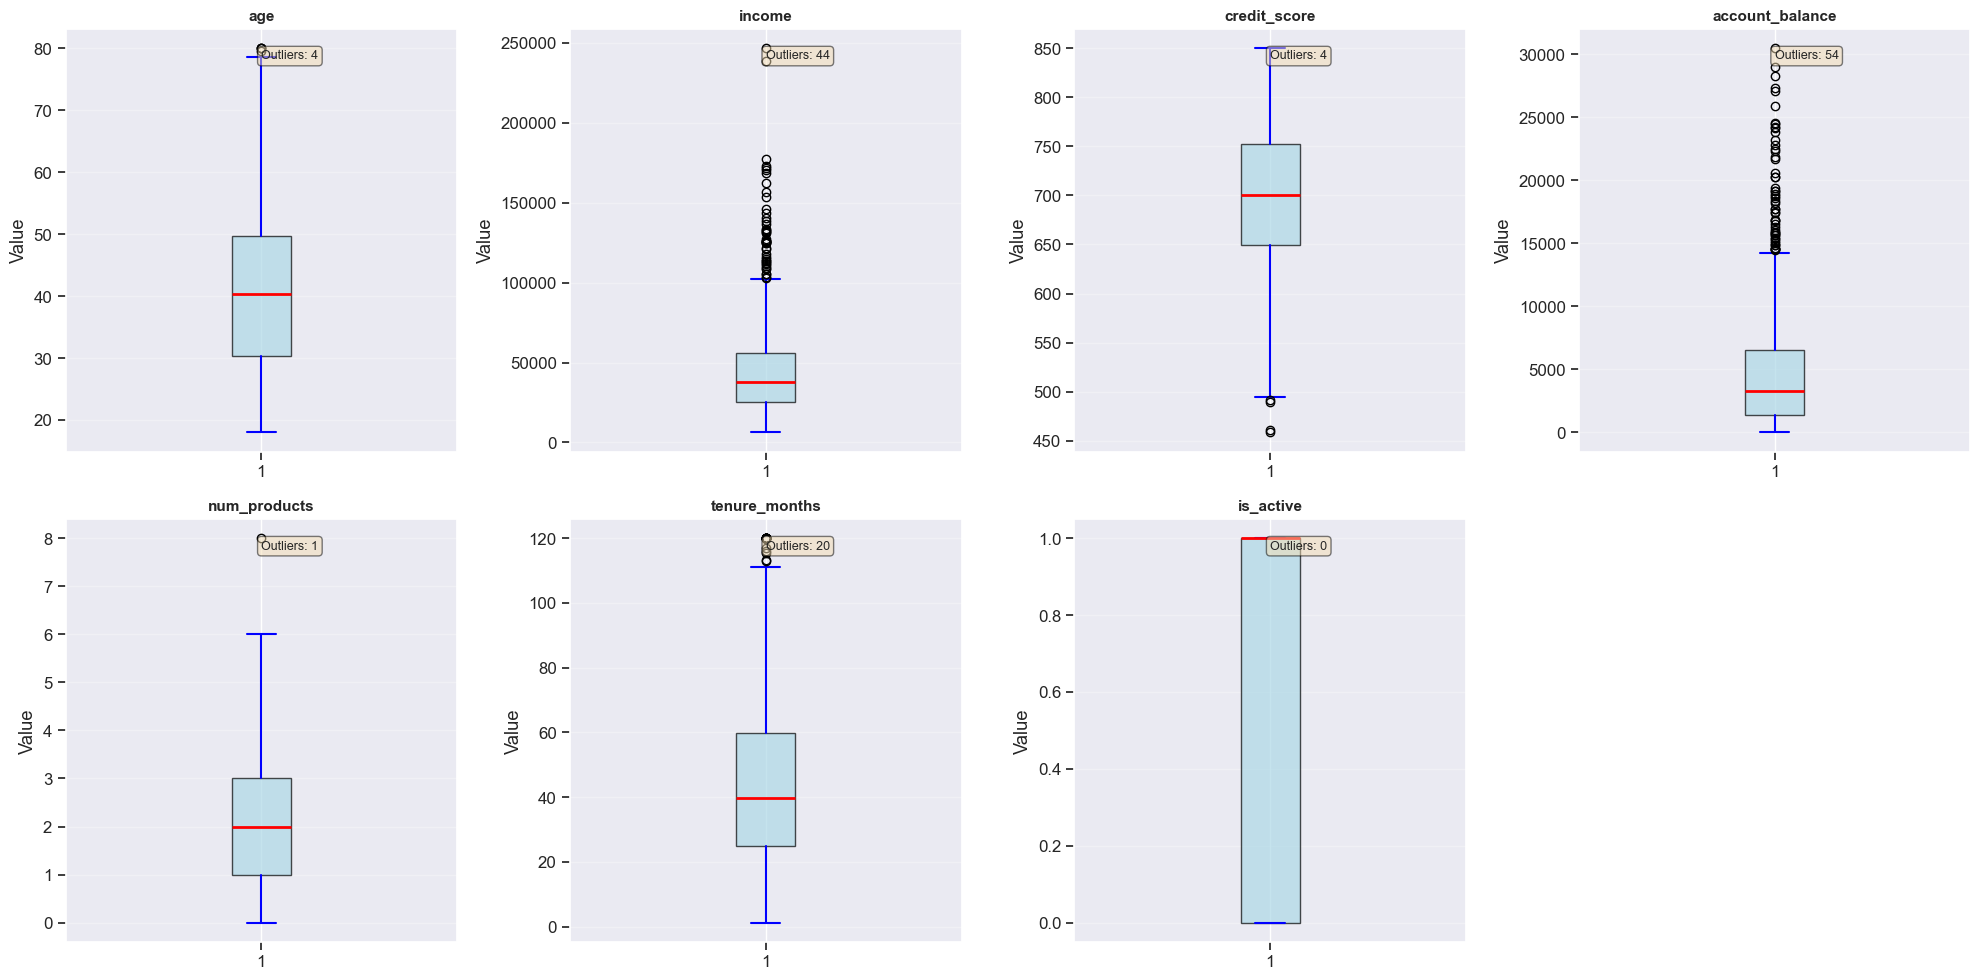

In [28]:
# Box plots for outlier detection
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    bp = axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                            boxprops=dict(facecolor='lightblue', alpha=0.7),
                            medianprops=dict(color='red', linewidth=2),
                            whiskerprops=dict(color='blue', linewidth=1.5),
                            capprops=dict(color='blue', linewidth=1.5))
    
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Calculate and display outlier info
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col].count()
    axes[idx].text(0.5, 0.95, f'Outliers: {outliers}', transform=axes[idx].transAxes,
                   fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Remove empty subplot
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


### Lets Dive Deeper and Understanding Box Plots and Outliers

Alright, future data scientists! You've just generated a series of box plots, and I know what you're thinking right now: *"Okay, these look a bit different from histograms. What are these boxes and lines telling me?"*

Don't worry – you're not alone! Box plots are incredibly powerful tools for quickly understanding the **spread, central tendency, and presence of outliers** in your data. Think of them as a condensed summary of your feature's "personality."

Let's break down what these graphs are saying and why these insights are crucial for our machine learning journey.

---

#### **What Each Box Plot Represents (and What It's Telling Us!)**

Each plot is a **box plot (or box-and-whisker plot)**, which visually summarizes the distribution of a numerical variable using five key statistics:

*   **The Box**: Represents the **Interquartile Range (IQR)**, spanning from the 25th percentile (Q1) to the 75th percentile (Q3). This is where the "middle 50%" of your data lies.
*   **The Red Line inside the Box**: This is the **Median** (50th percentile), indicating the central value of the data.
*   **The Whiskers (Blue Lines)**: Extend from the box to the minimum and maximum values within 1.5 times the IQR from Q1 and Q3, respectively. They show the typical range of the data.
*   **The Circles (Outliers)**: Individual points beyond the whiskers are considered **outliers**. These are values that are unusually far from the rest of the data.

---
<div align="center">
<img src="image.png" alt="Four plots showing Churn Rate by Age Group, Churn Rate by Tenure, Age vs Income colored by churn, and Products vs Balance colored by churn." style="width: 100%; max-width: 800px;">
</div>

Let's go through each feature:

---

##### **1. `age`**
*   **What it shows**: The distribution of customer ages.
*   **Key Insights**:
    *   The median age is around 40-42 years (red line).
    *   The bulk of customers (the box) are between approximately 30 and 50 years old.
    *   The whiskers extend from roughly 18 to 78 years.
    *   **Outliers**: There are 4 outliers detected, all on the upper end (ages around 78-80). This suggests a few customers are significantly older than the majority, but still within a plausible range for age.
*   **Why it matters**: Age appears relatively well-distributed with a few older individuals. These outliers might represent a specific customer segment or simply natural variation. For modeling, these outliers are unlikely to be problematic unless they represent data entry errors.

##### **2. `income`**
*   **What it shows**: The distribution of customer incomes.
*   **Key Insights**:
    *   The median income is relatively low, around 40,000-45,000.
    *   The box is quite narrow, indicating that 50% of customers have incomes concentrated in a smaller range (roughly 30,000 to 55,000).
    *   The upper whisker is much longer than the lower one, and there's a dense cluster of points above it.
    *   **Outliers**: A significant number of outliers (44) are present on the upper end, with incomes extending up to 250,000. This indicates a highly right-skewed distribution, where most customers have lower incomes, but a substantial number have much higher incomes.
*   **Why it matters**: The high number of upper outliers and strong right-skewness are critical. This feature will likely need **log transformation** or other scaling techniques before being used in many machine learning models (e.g., linear regression, neural networks) to ensure the model isn't overly influenced by these high-income individuals.

##### **3. `credit_score`**
*   **What it shows**: The distribution of customer credit scores.
*   **Key Insights**:
    *   The median credit score is around 700.
    *   The box indicates that 50% of customers have credit scores between approximately 650 and 750.
    *   The whiskers cover a range from about 500 to 850.
    *   **Outliers**: There are 4 outliers detected, all on the lower end (scores around 450-500). This suggests a few customers have significantly lower credit scores than the majority.
*   **Why it matters**: Credit score is fairly symmetrically distributed around a good median, which is ideal for many models. The few lower outliers might be important to investigate, as they could represent a distinct risk group. Depending on the model, these might be kept as is or capped.

##### **4. `account_balance`**
*   **What it shows**: The distribution of customer account balances.
*   **Key Insights**:
    *   The median account balance is very low, around 3,000-4,000.
    *   The box is narrow and close to zero, indicating that most customers have relatively small balances (roughly 1,000 to 7,000).
    *   The upper whisker is very long, and there's a very dense cluster of points above it.
    *   **Outliers**: A very large number of outliers (54) are present on the upper end, with balances extending up to 30,000. This indicates a highly right-skewed distribution, similar to income, but even more pronounced.
*   **Why it matters**: This feature is extremely right-skewed with many high outliers. Like `income`, `account_balance` will almost certainly require **log transformation** or other robust scaling methods to normalize its distribution and prevent models from being disproportionately affected by a few customers with very high balances.

##### **5. `num_products`**
*   **What it shows**: The distribution of the number of products a customer holds.
*   **Key Insights**:
    *   The median number of products is 2.
    *   The box shows that 50% of customers hold between 1 and 3 products.
    *   The whiskers extend from 0 to 6 products.
    *   **Outliers**: There is 1 outlier detected, representing a customer with 8 products.
*   **Why it matters**: This feature is discrete and shows a typical distribution for "count" data. The single outlier at 8 products is likely a valid data point and doesn't necessarily need special handling, though it's good to be aware of. This feature might be treated as categorical or numerical depending on the model.

##### **6. `tenure_months`**
*   **What it shows**: The distribution of customer tenure in months.
*   **Key Insights**:
    *   The median tenure is around 35-40 months.
    *   The box indicates that 50% of customers have tenure between approximately 20 and 60 months.
    *   The whiskers extend from 0 to about 110 months.
    *   **Outliers**: There are 20 outliers detected, all on the upper end (tenure around 110-120 months). This suggests a group of long-term customers.
*   **Why it matters**: Tenure shows a reasonable spread, but the upper outliers indicate a segment of very loyal, long-standing customers. These outliers are likely genuine and important for understanding customer loyalty. They might not need removal but could be a strong predictor in churn models.

##### **7. `is_active`**
*   **What it shows**: The distribution of the `is_active` flag (0 or 1).
*   **Key Insights**:
    *   This is a binary categorical variable, represented as a numerical one. The box plot shows a single box at 1.0, with a very short lower whisker extending to 0.0.
    *   The median is 1.0, and the box covers the range from 0.0 to 1.0, indicating that both values are present. The concentration at 1.0 suggests more active customers.
    *   **Outliers**: 0 outliers are detected, which is expected for a binary variable.
*   **Why it matters**: This plot confirms `is_active` is a binary feature. It's important to treat this as a categorical feature in most ML models, even though it's numerically encoded. The distribution shows that a majority of customers are active (value 1).

---

#### **Why These Insights Matter for Data Science/ML**

Understanding these distributions and outliers is not just an academic exercise; it directly impacts your machine learning pipeline:

*   **Preprocessing Decisions**:
    *   **Skewed Features (`income`, `account_balance`)**: Strongly skewed features can violate assumptions of some linear models and make others less effective. We'll likely need to apply **transformations** (like log or square root) to make them more normally distributed.
    *   **Outlier Handling**: For features like `income` and `account_balance`, the sheer number of outliers suggests they are part of the natural distribution (e.g., a few very wealthy customers). For `age` or `credit_score`, the few outliers might be genuine extreme cases. Deciding whether to **remove, cap (winsorize), or transform** outliers depends on their nature and impact on the model.
*   **Feature Importance**: Features with distinct distributions or clear outlier patterns (like high-income customers) often hold significant predictive power.
*   **Model Selection**: Knowing the distribution helps in choosing appropriate models. For instance, tree-based models are generally more robust to skewed data and outliers than linear models.
*   **Domain Understanding**: These plots give us a quick, intuitive grasp of our customer base. For example, we now know we have many customers with low account balances but a few with very high ones, which could be crucial for business strategy.

By carefully examining these box plots, you've gained valuable insights that will guide your next steps in data cleaning, feature engineering, and model building! Great job being a data detective!

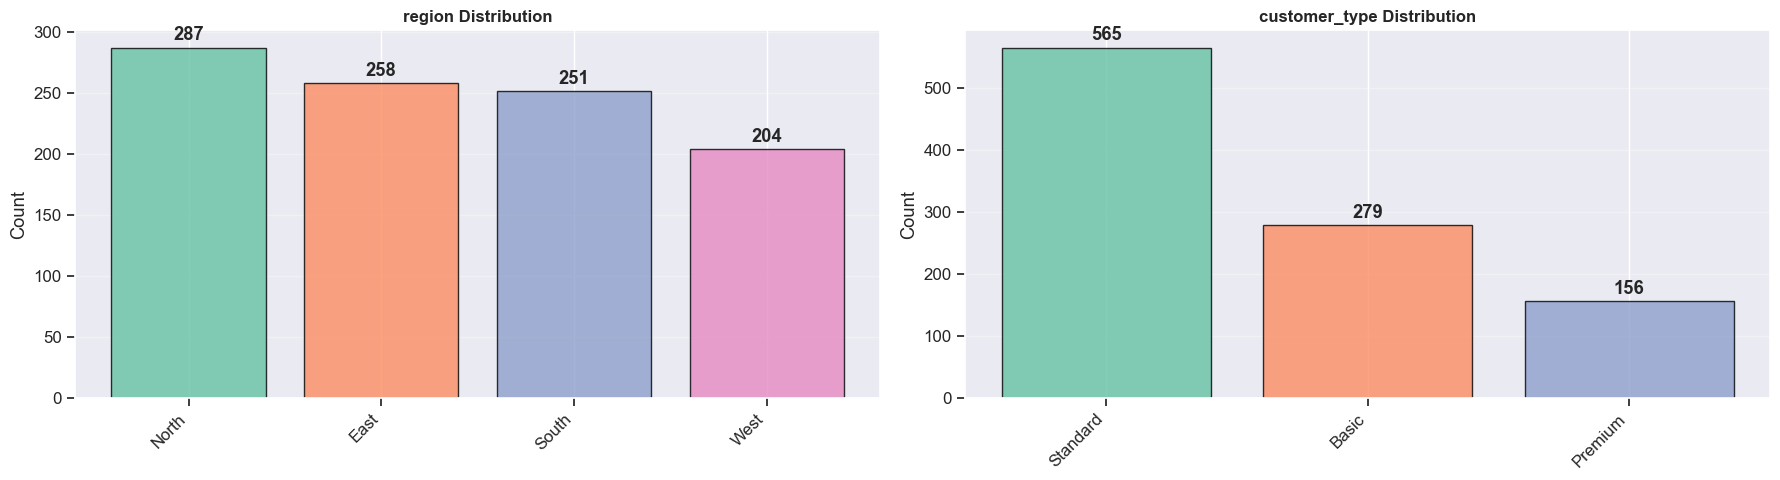


Categorical Features Summary:

REGION
region
North    287
East     258
South    251
West     204
Name: count, dtype: int64
Unique values: 4
Mode: North

CUSTOMER_TYPE
customer_type
Standard    565
Basic       279
Premium     156
Name: count, dtype: int64
Unique values: 3
Mode: Standard


In [29]:
# Categorical features analysis
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

fig, axes = plt.subplots(1, len(categorical_cols), figsize=(18, 5))

for idx, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    
    # Bar plot
    axes[idx].bar(range(len(value_counts)), value_counts.values, 
                  color=sns.color_palette("Set2", len(value_counts)), edgecolor='black', alpha=0.8)
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Count')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v + max(value_counts.values)*0.01, str(v), 
                      ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed categorical summary
print("\nCategorical Features Summary:")
print("="*70)
for col in categorical_cols:
    print(f"\n{col.upper()}")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")
    print(f"Mode: {df[col].mode()[0]}")


### Alright! Let’s make sense of our categorical features

So, future data scientists! You've just generated these bar plots, and I know what you're thinking: *"These look straightforward, but what deeper insights can I pull from them for my ML project?"*

You're asking the right questions! These plots are incredibly useful for understanding the **composition and balance** of your categorical features. They tell us how our customer base is segmented across different groups.

Let's break down what these graphs are saying and why these insights are crucial for our machine learning journey.

---

#### **What Each Bar Plot Represents (and What It's Telling Us!)**

Each plot is a **bar chart** showing the **distribution** of a single categorical variable.

-   **X-axis**: The different categories within that feature (e.g., regions, customer types).
-   **Y-axis**: The **Count** (frequency) of observations belonging to each category.
-   **Numbers on top of bars**: The exact count for each category, making it easy to compare.

---

#### **1. `region` Distribution**

This bar chart shows how our customers are distributed across different geographical regions: North, East, South, and West.

*   **What it's saying:**
    *   The **North** region has the highest number of customers (287).
    *   The **West** region has the fewest customers (204).
    *   The **East** (258) and **South** (251) regions have a similar number of customers, falling between North and West.
    *   Overall, the distribution across regions is relatively balanced, with no single region overwhelmingly dominating or being extremely rare.

*   **Why these insights matter for ML:**
    *   **Feature Importance:** If `region` turns out to be an important predictor for our target variable (e.g., churn), we know that the model will have enough data from most regions to learn patterns effectively.
    *   **Sampling & Stratification:** When splitting data into training and testing sets, we might want to ensure that each region is proportionally represented to avoid bias.
    *   **Business Strategy:** This distribution can inform marketing efforts or resource allocation. For example, the North region might be a good place to test new initiatives due to its larger customer base.

---

#### **2. `customer_type` Distribution**

This bar chart illustrates the breakdown of our customer base by their `customer_type`: Standard, Basic, and Premium.

*   **What it's saying:**
    *   The **Standard** customer type is by far the most common, accounting for 565 customers. This is more than half of our total customer base!
    *   **Basic** customers are the second most frequent, with 279 observations.
    *   **Premium** customers are the least common, with only 156 observations.
    *   This distribution is highly **skewed**, meaning there's a significant imbalance in the number of customers across these types.

*   **Why these insights matter for ML:**
    *   **Class Imbalance:** The imbalance in `customer_type` is a critical finding. If we're trying to predict something related to `Premium` customers (e.g., their likelihood to upgrade), the model might struggle due to the limited number of examples.
    *   **Model Bias:** A model trained on this data might become biased towards the `Standard` customer type, potentially performing poorly on `Premium` customers.
    *   **Preprocessing Decisions:** We might need to consider techniques like **oversampling** (duplicating `Premium` customer data) or **undersampling** (reducing `Standard` customer data) to balance the classes, especially if `customer_type` is a target variable or a highly influential feature.
    *   **Feature Engineering:** We could consider combining `Basic` and `Premium` into a single "Non-Standard" category if their behavior is similar, or if the `Premium` count is too low for meaningful analysis.
    *   **Business Impact:** This highlights that our customer base is heavily weighted towards "Standard" users. Any business decisions or product changes should consider this demographic.

---

#### **Key Takeaways from Categorical Distributions:**

*   **Balance is Key:** For categorical features, understanding if categories are balanced or imbalanced helps us anticipate potential challenges in model training and evaluation.
*   **Inform Preprocessing:** Highly skewed distributions might require special handling (e.g., resampling, binning) to ensure our models learn effectively from all categories.
*   **Contextualize Results:** Knowing the distribution helps us interpret model predictions. If a model performs poorly on `Premium` customers, we know it might be due to the scarcity of their data.

These simple bar charts provide a wealth of information that directly influences how we approach data preprocessing, model selection, and even business strategy. Keep up the great work, and let's continue uncovering more stories from our data!

### **3. Bivariate Analysis - Feature Relationships**

Bivariate analysis explores relationships between two variables, particularly between features and the target variable.


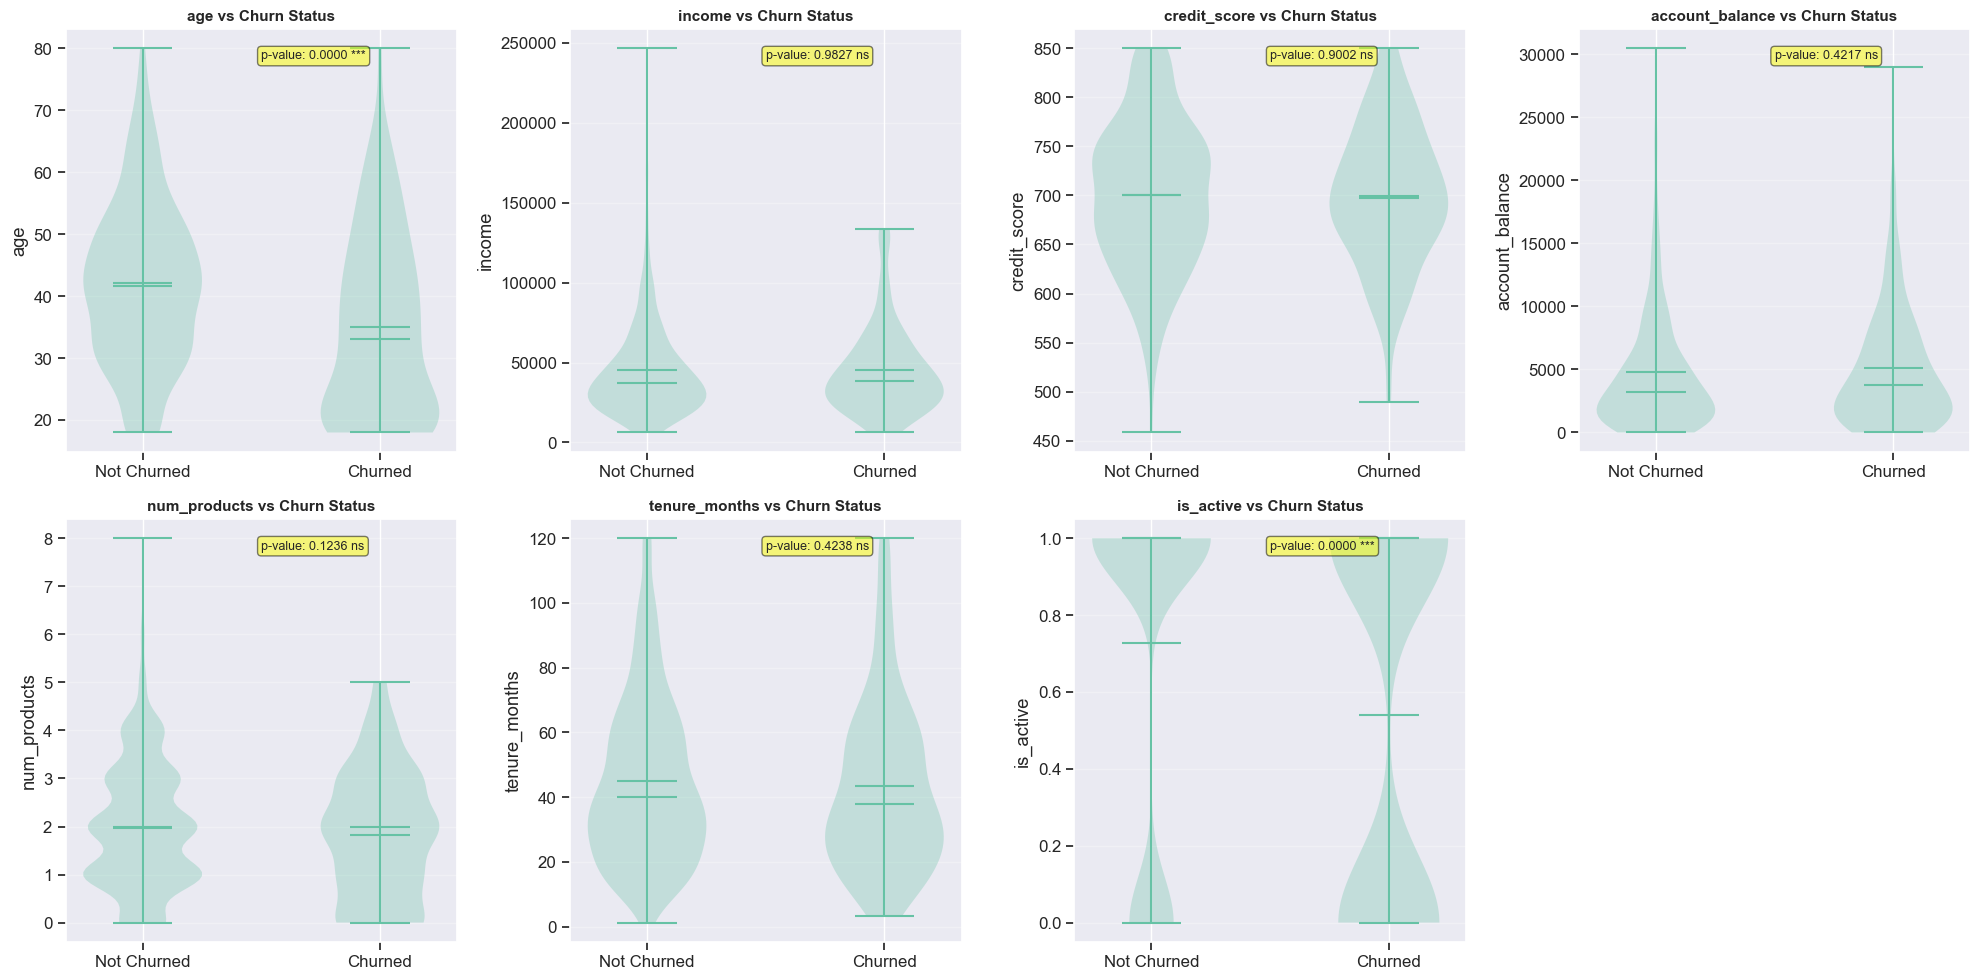


Key Insights:
* Statistical significance: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant
* Look for features with significant differences between churned and not churned groups


In [30]:
# Numerical features vs Target (churned)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    # Create violin plot for distribution comparison
    df_plot = df[[col, 'churned']].dropna()
    
    parts = axes[idx].violinplot([df_plot[df_plot['churned']==0][col], 
                                   df_plot[df_plot['churned']==1][col]], 
                                  positions=[0, 1], showmeans=True, showmedians=True)
    
    axes[idx].set_xticks([0, 1])
    axes[idx].set_xticklabels(['Not Churned', 'Churned'])
    axes[idx].set_title(f'{col} vs Churn Status', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add statistical test
    not_churned = df_plot[df_plot['churned']==0][col]
    churned = df_plot[df_plot['churned']==1][col]
    t_stat, p_value = stats.ttest_ind(not_churned, churned)
    
    sig_text = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    axes[idx].text(0.5, 0.95, f'p-value: {p_value:.4f} {sig_text}', 
                   transform=axes[idx].transAxes, fontsize=9, 
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# Remove empty subplot
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("="*70)
print("* Statistical significance: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")
print("* Look for features with significant differences between churned and not churned groups")


### Exploring Relationships: Bivariate Analysis Results (Numerical vs. Target)

Alright, future data scientists! You've just generated a series of **violin plots**, and I know what you're thinking: *"These look like a mix of histograms and box plots, but what are they really telling me about how features relate to churn?"*

You're on the right track! Violin plots are fantastic for comparing the **distribution** of a numerical feature across different categories of another feature (in our case, 'Churn Status'). They give us a rich view of not just the median and spread, but also the density of data points at various values.

Let's break down what these graphs are saying and why these insights are absolutely crucial for building effective machine learning models!

---

#### **What Each Violin Plot Represents (and What It's Telling Us!)**

Each plot compares a numerical feature (like `age` or `income`) against our target variable, `churned` (0 for 'Not Churned', 1 for 'Churned').

-   **The "Violin" Shape**: This shows the **density** of data points. A wider section means more customers fall into that range of values.
-   **The Inner Box Plot**: Inside each violin, you'll see a mini box plot, indicating:
    *   **White Dot**: The **median** value (the middle point).
    *   **Thick Bar**: The **interquartile range (IQR)**, representing the middle 50% of the data.
    *   **Thin Line**: The **whiskers**, extending to the minimum and maximum values within 1.5 times the IQR.
-   **P-value**: This little number in the yellow box is super important! It comes from a statistical test (like a t-test or Mann-Whitney U test) and tells us if the observed difference between the 'Not Churned' and 'Churned' groups is **statistically significant**.
    *   **`p-value < 0.05` (often marked with `***`)**: Means there's a very strong chance the difference is real and not just random. This feature is likely a good predictor of churn!
    *   **`p-value > 0.05` (often marked with `ns` for 'not significant')**: Means we don't have enough evidence to say there's a real difference. This feature might not be a strong predictor on its own.

---

#### **Key Insights from Our Bivariate Analysis**

Let's go through each plot and uncover its story:

1.  **`age` vs Churn Status (p-value: 0.0000 ***)**
    *   **What it shows**: The violin for 'Churned' customers is noticeably shifted downwards and wider around the 30-40 age range, while 'Not Churned' customers are more concentrated around 40-50.
    *   **Insight**: There's a **highly significant difference** in age between churned and non-churned customers. **Younger customers (roughly 30-40 years old) appear to be more prone to churning** compared to older customers.
    *   **ML Relevance**: `age` is a **strong predictor** of churn. We should definitely include it in our models, and perhaps even consider creating age-group features (e.g., 'young', 'middle-aged', 'senior') if the business context supports it.

2.  **`income` vs Churn Status (p-value: 0.9827 ns)**
    *   **What it shows**: Both violin plots look almost identical. They are heavily skewed towards lower incomes, and their medians and overall shapes are very similar.
    *   **Insight**: There is **no statistically significant difference** in income distribution between churned and non-churned customers.
    *   **ML Relevance**: `income`, as it stands, is likely **not a strong predictor** of churn. We might consider if transformations (like log-transforming due to skewness) or interactions with other features could make it more useful, but on its own, it doesn't differentiate churners well.

3.  **`credit_score` vs Churn Status (p-value: 0.9002 ns)**
    *   **What it shows**: The distributions for both groups are very similar, centered around a credit score of 700, with similar spreads.
    *   **Insight**: There is **no statistically significant difference** in credit score between churned and non-churned customers.
    *   **ML Relevance**: Similar to `income`, `credit_score` appears to be **not a strong predictor** of churn. It might not add much predictive power to our models.

4.  **`account_balance` vs Churn Status (p-value: 0.4217 ns)**
    *   **What it shows**: Both violin plots are heavily skewed towards lower account balances, and their shapes, medians, and spreads are nearly identical.
    *   **Insight**: There is **no statistically significant difference** in account balance between churned and non-churned customers.
    *   **ML Relevance**: `account_balance` is **not a strong predictor** of churn. This is an interesting finding, as one might intuitively expect customers with lower balances to churn more. Our data suggests otherwise.

5.  **`num_products` vs Churn Status (p-value: 0.1236 ns)**
    *   **What it shows**: The distributions for the number of products are very similar for both groups, with peaks around 1 and 2 products.
    *   **Insight**: There is **no statistically significant difference** in the number of products held by churned versus non-churned customers.
    *   **ML Relevance**: `num_products` is **not a strong predictor** of churn.

6.  **`tenure_months` vs Churn Status (p-value: 0.4238 ns)**
    *   **What it shows**: Both violin plots show similar right-skewed distributions, with most customers having lower tenure and a tapering off for longer tenures. The medians and spreads are very close.
    *   **Insight**: There is **no statistically significant difference** in tenure months between churned and non-churned customers.
    *   **ML Relevance**: `tenure_months` is **not a strong predictor** of churn. This is another counter-intuitive finding, as often longer tenure is associated with loyalty. Our synthetic data suggests it's not a differentiator here.

7.  **`is_active` vs Churn Status (p-value: 0.0000 ***)**
    *   **What it shows**: This is a binary feature (0 or 1). The 'Not Churned' violin is much wider at `1.0` (active), indicating a high proportion of active customers. Conversely, the 'Churned' violin is much wider at `0.0` (inactive), indicating a high proportion of inactive customers.
    *   **Insight**: There's a **highly significant difference** in `is_active` status. **Inactive customers are significantly more likely to churn**, while active customers are significantly less likely to churn.
    *   **ML Relevance**: `is_active` is a **very strong predictor** of churn. This feature will be extremely valuable for our models and could even be a direct target for business interventions (e.g., re-engagement campaigns for inactive customers).

---

#### **Why These Insights Matter for Data Science & ML**

-   **Feature Selection**: We've identified `age` and `is_active` as potentially strong features for predicting churn. Features with non-significant p-values (like `income`, `credit_score`, `account_balance`, `num_products`, `tenure_months`) might be less useful on their own, or might require more complex feature engineering to extract value.
-   **Model Interpretation**: Understanding these relationships helps us explain *why* a model makes certain predictions. For instance, if a model predicts churn for a young, inactive customer, we can point to these bivariate analysis results as supporting evidence.
-   **Business Strategy**: These findings directly inform business decisions. For example, targeting younger customers or inactive customers with retention strategies could be highly effective.
-   **Preprocessing Decisions**: Features with highly skewed distributions (like `income` and `account_balance`) might benefit from transformations (e.g., log transformation) before being fed into certain models, even if they aren't strong predictors on their own.

This bivariate analysis has given us a much clearer picture of which customer attributes are truly linked to churn. We're now better equipped to select and engineer features for our predictive model!

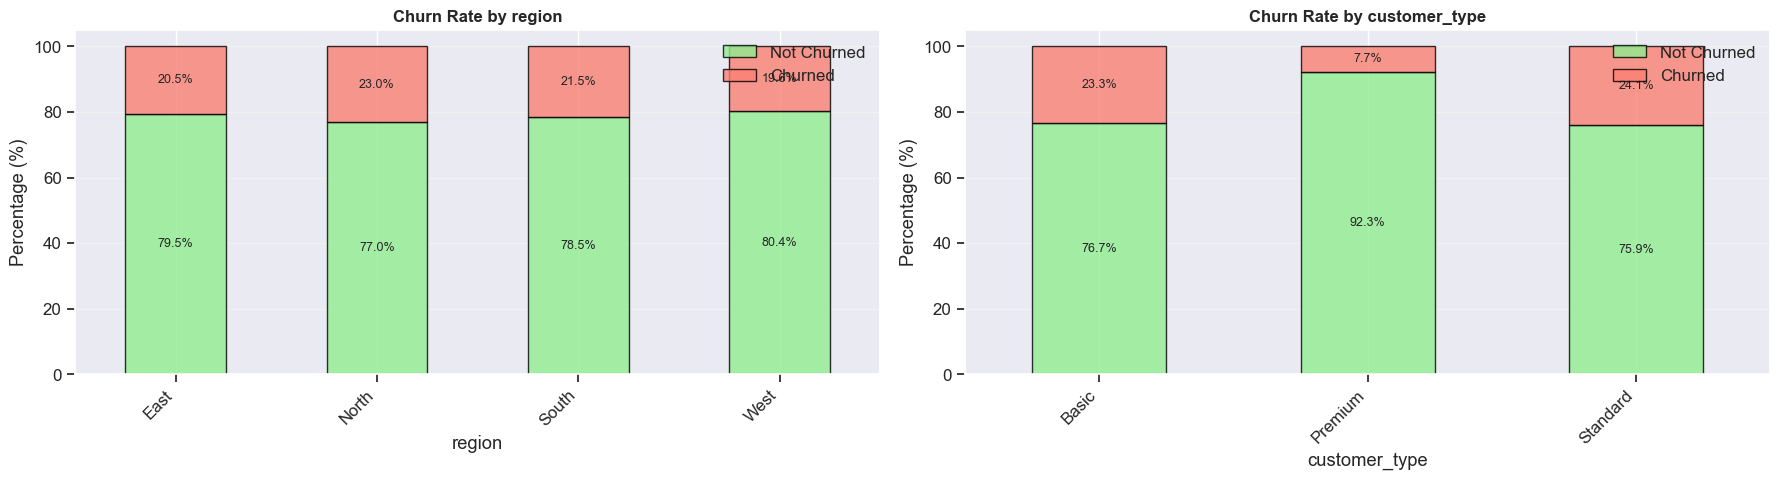


Categorical Features vs Target - Chi-Square Tests:

region:
  Chi-square statistic: 0.9364
  P-value: 0.8166 ns
  Interpretation: No significant relationship

customer_type:
  Chi-square statistic: 20.4839
  P-value: 0.0000 ***
  Interpretation: SIGNIFICANT relationship with churn


In [31]:
# Categorical features vs Target
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(18, 5))

for idx, col in enumerate(categorical_cols):
    # Create stacked bar chart
    churn_by_category = pd.crosstab(df[col], df['churned'], normalize='index') * 100
    
    churn_by_category.plot(kind='bar', stacked=True, ax=axes[idx], 
                           color=['lightgreen', 'salmon'], alpha=0.8, edgecolor='black')
    
    axes[idx].set_title(f'Churn Rate by {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(['Not Churned', 'Churned'], loc='upper right')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add percentage labels
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9)

plt.tight_layout()
plt.show()

# Chi-square test for categorical features
print("\nCategorical Features vs Target - Chi-Square Tests:")
print("="*70)
from scipy.stats import chi2_contingency

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['churned'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    sig_text = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    print(f"\n{col}:")
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  P-value: {p_value:.4f} {sig_text}")
    print(f"  Interpretation: {'SIGNIFICANT relationship with churn' if p_value < 0.05 else 'No significant relationship'}")


### Exploring Relationships: Bivariate Analysis Results (Categorical vs. Target)

Alright, future data scientists! You've just generated these two stacked bar charts, and I know what you're thinking: *"These look like simple comparisons, but what deep secrets are they revealing about our customers and their likelihood to churn?"*

You're asking exactly the right questions! These plots are incredibly powerful for understanding the **relationship between our categorical features and our target variable (churn)**. They help us see if certain groups of customers are more or less likely to churn, which is gold for predicting future behavior!

Let's break down what these graphs are saying and why these insights are absolutely crucial for building effective machine learning models and making smart business decisions.

---

#### **What Each Stacked Bar Chart Represents (and What It's Telling Us!)**

Each plot is a **stacked bar chart**, which is perfect for visualizing the proportion of 'Churned' vs. 'Not Churned' customers within each category of a feature.

*   **X-axis**: Represents the different categories of a categorical feature (e.g., `region`, `customer_type`).
*   **Y-axis**: Shows the `Percentage (%)` of customers, summing up to 100% for each category.
*   **Colors**:
    *   **Light Green**: Represents customers who **did NOT churn**.
    *   **Salmon**: Represents customers who **DID churn**.

---

#### **1. Churn Rate by Region**

This chart shows us how churn is distributed across different geographical regions: East, North, South, and West.

*   **What the Graph Says:**
    *   **Overall Consistency**: We observe that the churn rate is relatively consistent across all regions.
    *   **North Region**: Shows the highest churn rate at **23.0%**.
    *   **West Region**: Has the lowest churn rate at **19.6%**.
    *   **East and South**: Fall in between with 20.5% and 21.5% churn, respectively.

*   **Why These Insights Matter (ML Context):**
    *   **Moderate Predictive Power**: Since the churn rates don't vary drastically between regions, `region` might not be the strongest individual predictor of churn. However, even small differences can be meaningful.
    *   **Feature Importance**: A model might still find some value in `region`, especially if combined with other features (e.g., "North region customers with low income").
    *   **Business Strategy**: While not a huge differentiator, the slightly higher churn in the North could prompt further investigation into regional market conditions, competitor activity, or customer service in that area.

---

#### **2. Churn Rate by Customer Type**

This chart reveals the churn patterns based on different customer segments: Basic, Premium, and Standard.

*   **What the Graph Says:**
    *   **Striking Differences**: This plot immediately highlights a significant disparity in churn rates across customer types.
    *   **Premium Customers**: Exhibit a remarkably low churn rate of just **7.7%**. This group is highly loyal!
    *   **Standard Customers**: Have the highest churn rate at **24.1%**.
    *   **Basic Customers**: Are close behind Standard customers with a churn rate of **23.3%**.

*   **Why These Insights Matter (ML Context):**
    *   **High Predictive Power**: The `customer_type` feature is a **very strong indicator of churn**. The difference between Premium and other types is substantial, making it a crucial feature for any predictive model.
    *   **Feature Engineering Opportunities**: We might consider creating new features, such as a binary `is_premium` feature (1 if Premium, 0 otherwise), as this distinction is highly predictive.
    *   **Targeted Interventions**: This insight is invaluable for business strategy. We should analyze what makes Premium customers so loyal and try to replicate those factors for Basic and Standard customers. Conversely, retention efforts should heavily focus on Standard and Basic customer segments.
    *   **Model Interpretation**: When building models, we would expect `customer_type` (especially the 'Premium' category) to have a high feature importance.

---

#### **Your Bivariate Analysis Superpower!**

By looking at these simple yet powerful stacked bar charts, you've gained critical insights into how categorical features influence customer churn. This kind of analysis helps you:

*   **Identify key drivers**: Pinpoint which customer segments are most at risk.
*   **Inform feature selection**: Understand which features will be most valuable for your machine learning model.
*   **Guide business decisions**: Develop targeted strategies to reduce churn and improve customer satisfaction.

Keep up the great work! You're becoming a true data detective!

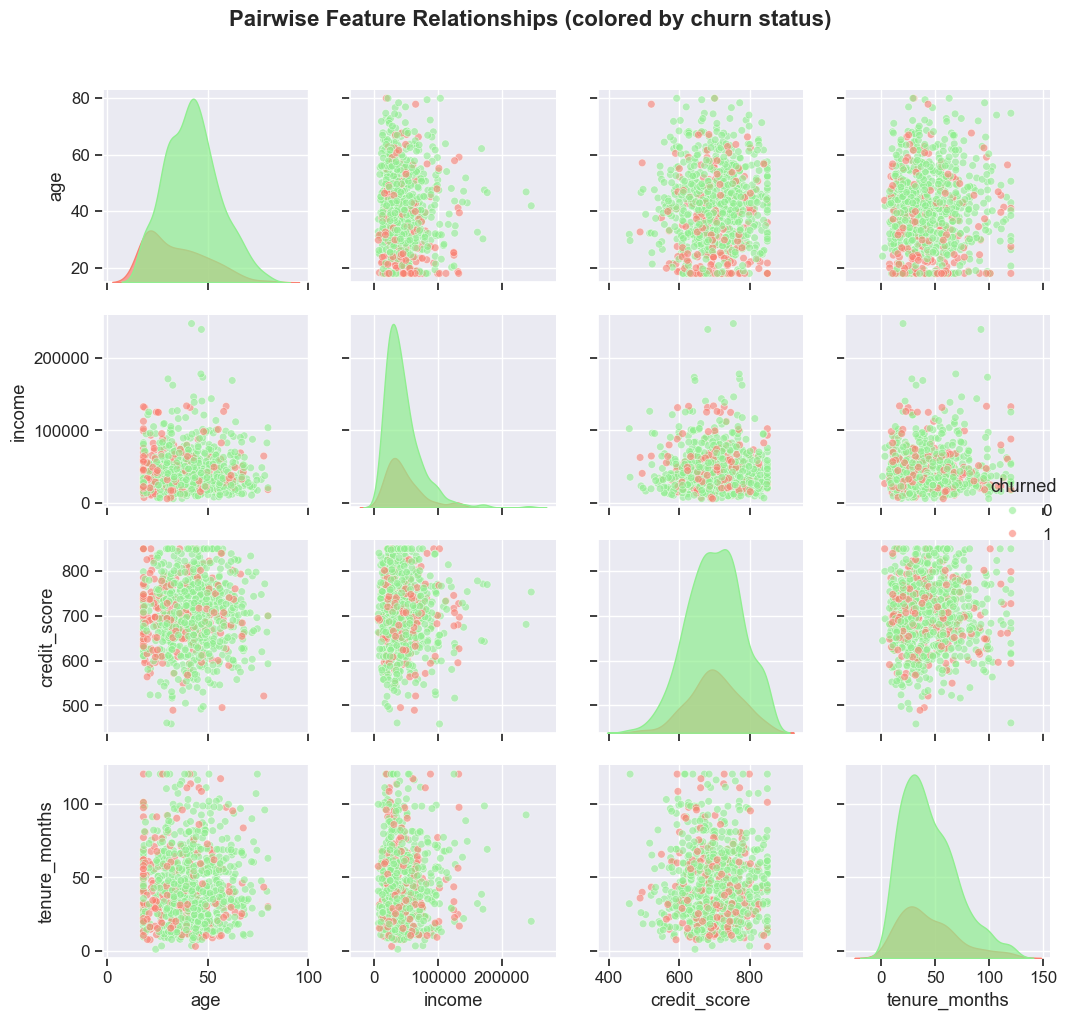

In [32]:
# Pairwise relationships - Scatter plot matrix
selected_features = ['age', 'income', 'credit_score', 'tenure_months', 'churned']
df_selected = df[selected_features].dropna()

# Create pairplot with hue for churn status
sns.pairplot(df_selected, hue='churned', diag_kind='kde', 
             palette={0: 'lightgreen', 1: 'salmon'},
             plot_kws={'alpha': 0.6, 's': 30},
             diag_kws={'alpha': 0.7})
plt.suptitle('Pairwise Feature Relationships (colored by churn status)', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


### Lets understand Pairwise Feature Relationships (Bivariate & Multivariate Insights)

Alright, future data scientists! You've just generated a **pairplot**, and I know what you're thinking: *"Wow, that's a lot of scatter plots and curves! How do I make sense of this intricate grid of relationships?"*

Don't worry – you're not alone! The `pairplot` is an incredibly powerful tool that combines univariate and bivariate analysis into one comprehensive visualization. It's like getting a panoramic view of your data's entire landscape, helping us spot hidden connections and potential predictors.

Let's break down what this fascinating grid of graphs is saying and why these insights are absolutely crucial for building robust machine learning models!

---

#### **What Each Graph Represents (The Anatomy of a Pairplot)**

This visualization is a **Pair Plot**, which is a grid of plots showing pairwise relationships between selected numerical features, with the added dimension of our target variable (`churned`) indicated by color.

*   **Diagonal Plots (KDE - Kernel Density Estimate):**
    *   These plots show the **distribution of each individual feature** (univariate analysis).
    *   Instead of a histogram, we see a **Kernel Density Estimate (KDE)**, which is a smoothed version of a histogram. It gives us a continuous probability density curve.
    *   Crucially, these are **colored by `churned` status (0 = lightgreen, 1 = salmon)**, allowing us to see if the distribution of a feature differs significantly between churned and non-churned customers.
*   **Off-Diagonal Plots (Scatter Plots):**
    *   These plots show the **relationship between every possible pair of features** (bivariate analysis).
    *   Each point represents a customer, and its position is determined by its values for the two features being compared.
    *   Again, the **color of each point indicates the `churned` status**, helping us visualize if churned and non-churned customers form distinct clusters or patterns in these two-dimensional spaces.

#### **Key Insights from the Pair Plot (What the Graphs are Telling Us!)**

Let's go through the grid and extract some valuable insights:

**1. Insights from the Diagonal (Individual Feature Distributions by Churn Status):**

*   **`age`:**
    *   The KDE plots for `age` show that both churned (salmon) and non-churned (lightgreen) customers have a similar distribution, peaking around 40-50 years old.
    *   **Insight:** `Age` alone doesn't seem to be a strong differentiator for churn, as the distributions for both groups largely overlap.
*   **`income`:**
    *   Both churned and non-churned customers exhibit a heavily **right-skewed distribution** for `income`, meaning most customers have lower incomes, with a long tail extending to higher incomes.
    *   **Insight:** While `income` is skewed, its distribution doesn't dramatically differ between churned and non-churned customers. This suggests `income` might not be a primary driver of churn on its own.
*   **`credit_score`:**
    *   The `credit_score` distributions for both groups are somewhat bell-shaped (approximating normal distribution) and largely overlap.
    *   **Insight:** Similar to `age` and `income`, `credit_score` doesn't show a clear separation between churned and non-churned customers based on its individual distribution.
*   **`tenure_months`:**
    *   This is where we see a more noticeable difference! The **salmon (churned) distribution is much more concentrated at lower `tenure_months` values**, peaking sharply around 0-20 months.
    *   The **lightgreen (non-churned) distribution is broader and extends to much higher `tenure_months`**, indicating a larger proportion of long-term customers.
    *   **Key Insight:** **Customers with shorter tenure are significantly more likely to churn.** This is a very strong indicator!

**2. Insights from the Off-Diagonal (Pairwise Relationships by Churn Status):**

*   **`age` vs. `income`, `credit_score`:**
    *   Looking at the scatter plots involving `age` with `income` or `credit_score`, we don't observe any strong linear relationships or distinct clusters of churned vs. non-churned customers. The points are quite scattered and intermingled.
    *   **Insight:** These pairs of features don't seem to have a strong, easily discernible relationship that directly explains churn.
*   **`tenure_months` vs. `age`, `income`, `credit_score`:**
    *   In all scatter plots where `tenure_months` is one of the axes (e.g., `tenure_months` vs. `age`, `tenure_months` vs. `income`, `tenure_months` vs. `credit_score`), we consistently see a higher density of **salmon (churned) points concentrated at the lower end of the `tenure_months` axis.**
    *   **Key Insight:** This reinforces our finding from the diagonal plots: **low `tenure_months` is a strong characteristic of churned customers, regardless of their `age`, `income`, or `credit_score`.** The other features don't seem to significantly alter this pattern.
*   **Other Pairwise Relationships (e.g., `income` vs. `credit_score`):**
    *   Most other scatter plots show a general spread of points with no obvious linear or non-linear patterns that clearly separate churned from non-churned customers.

#### **Why These Observations are Important for Data Science/ML**

These insights are incredibly valuable and directly impact our next steps in the ML pipeline:

*   **Feature Importance & Selection:**
    *   The strong visual evidence suggests that **`tenure_months` is likely a highly important feature for predicting churn.** We should definitely prioritize this feature in our models.
    *   `Age`, `income`, and `credit_score`, while potentially useful, don't show as clear a direct relationship with churn in these bivariate plots. Their predictive power might come from interactions with other features or more complex model structures.
*   **Preprocessing Decisions:**
    *   The **skewness in `income`** (and potentially `tenure_months` if we consider its raw distribution) might warrant **log transformations** or other scaling techniques to help models perform better, especially those sensitive to feature distributions (like linear models or neural networks).
*   **Model Selection:**
    *   Since the relationships aren't always simple linear separations, models capable of capturing **non-linear patterns** (e.g., tree-based models like Random Forests or Gradient Boosting, or neural networks) might be more effective than simple linear regression or logistic regression.
*   **Business Strategy:**
    *   The clear signal from `tenure_months` provides actionable business intelligence: **focus retention efforts on newer customers!** Understanding *why* new customers churn more could lead to targeted onboarding programs or early intervention strategies.

---

By carefully examining this pairplot, we've gained a much deeper understanding of our data's structure and how different features interact with each other and, most importantly, with our target variable, `churned`. This knowledge will be invaluable as we move towards building and evaluating our predictive models!

### **4. Multivariate Analysis - Correlation and Feature Interactions**

Multivariate analysis helps us understand how multiple features relate to each other simultaneously.


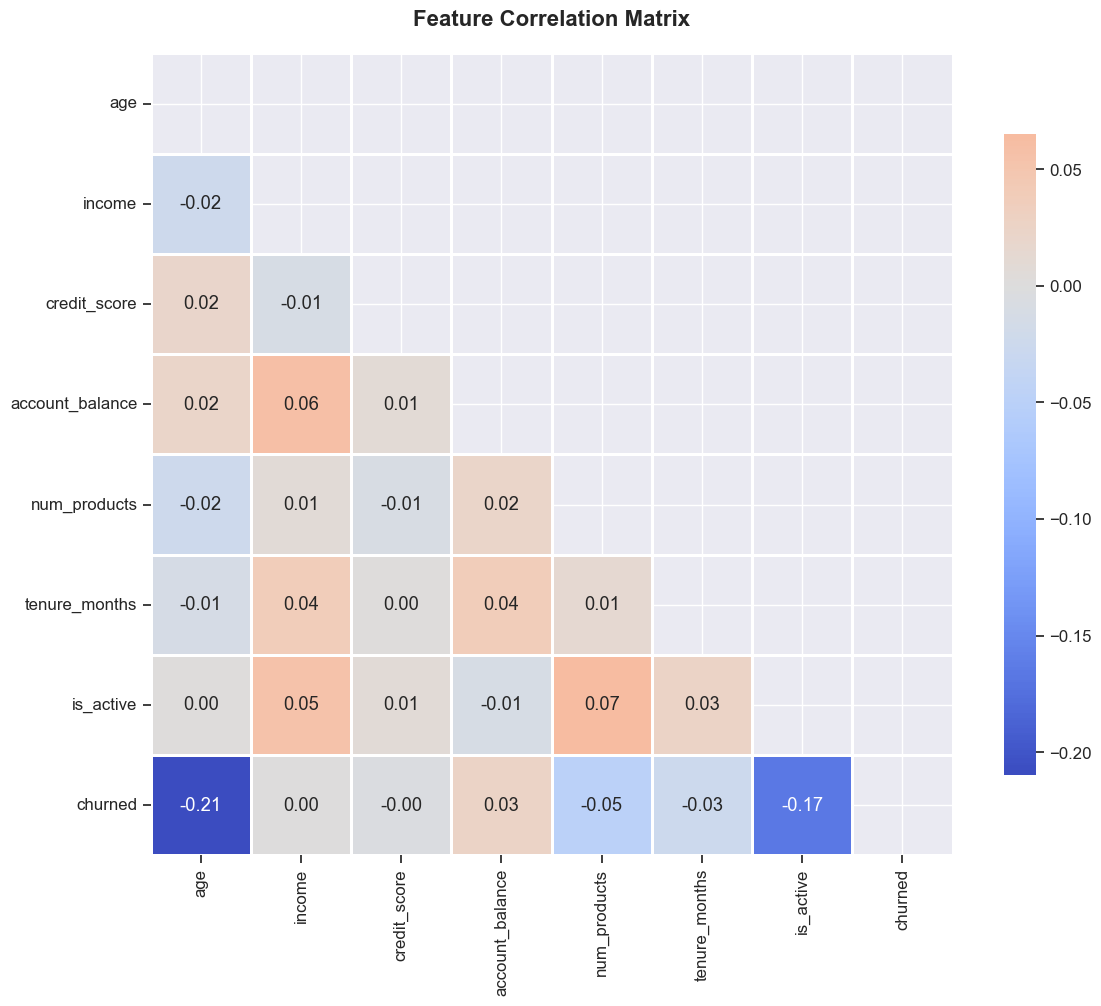


Highly Correlated Feature Pairs (|correlation| > 0.5):
No highly correlated feature pairs found.


In [33]:
# Correlation matrix - Understanding feature relationships
correlation_cols = numerical_cols + ['churned']
correlation_matrix = df[correlation_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify highly correlated features
print("\nHighly Correlated Feature Pairs (|correlation| > 0.5):")
print("="*70)

high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            high_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr:
    high_corr_df = pd.DataFrame(high_corr).sort_values('Correlation', key=abs, ascending=False)
    print(high_corr_df.to_string(index=False))
else:
    print("No highly correlated feature pairs found.")


### Its time to understand Multivariate Analysis - The Correlation Matrix

Alright, future data scientists! You've just generated a **correlation matrix**, and I know what you're thinking: *"This looks like a colorful grid of numbers, but what's the big picture here? How do all these features dance together?"*

You're asking exactly the right questions! The correlation matrix is an incredibly powerful tool for **multivariate analysis**, allowing us to see the linear relationships between *all pairs* of numerical features in our dataset, including how they relate to our target variable (`churned`). It's like getting a bird's-eye view of your data's entire social network!

Let's break down what this fascinating heatmap is saying and why these insights are absolutely crucial for building robust and effective machine learning models.

---

#### **What Each Square Represents (and What It's Telling Us!)**

This heatmap visualizes the **Pearson correlation coefficient** between each pair of features.

*   **The Grid:** Each cell at the intersection of a row and a column shows the correlation between those two features. Since the correlation of a feature with itself is always 1, and the correlation between A and B is the same as B and A, we typically show only the lower triangle (or upper triangle) to avoid redundancy.
*   **The Numbers (`.2f`):** These are the correlation coefficients, ranging from -1.00 to +1.00.
    *   **+1.00:** Perfect positive linear correlation (as one increases, the other increases proportionally).
    *   **-1.00:** Perfect negative linear correlation (as one increases, the other decreases proportionally).
    *   **0.00:** No linear correlation.
*   **The Colors (`coolwarm` cmap):** The color intensity and hue visually represent the strength and direction of the correlation.
    *   **Dark Blue (e.g., -0.21):** Strong negative correlation.
    *   **Light Blue/White (e.g., 0.00, -0.01):** Weak or no linear correlation.
    *   **Orange/Red (e.g., 0.06, 0.07):** Positive correlation.

---

#### **Key Insights from Our Correlation Matrix**

Let's put on our detective hats and see what stories our data is telling us:

*   **Strongest Relationship with Churn:**
    *   The most prominent correlation with our target variable `churned` is with **`age` (-0.21)**. This indicates a **moderate negative correlation**, meaning that as `age` increases, the likelihood of `churning` tends to slightly decrease. Older customers might be more loyal or have different needs.
    *   **`is_active` (-0.17)** also shows a negative correlation with `churned`. This makes intuitive sense: customers who are active are less likely to churn.
*   **Weak or No Relationship with Churn:**
    *   Features like `income` (0.00) and `credit_score` (-0.00) show **virtually no linear correlation** with `churned`. This is a crucial insight! It suggests that, in this dataset, a customer's income or credit score alone doesn't linearly predict whether they will churn.
    *   `account_balance`, `num_products`, and `tenure_months` also have very weak correlations with `churned` (close to 0).
*   **Relationships Between Features (Multicollinearity Check):**
    *   Looking at the correlations *between* our independent features, we observe that most are quite weak (close to 0). For example, `income` and `account_balance` have a very weak positive correlation (0.06).
    *   There are **no strong correlations (e.g., > 0.7 or < -0.7)** between any two independent features. This is generally good news, as it means we don't have significant **multicollinearity** issues in our numerical features, which can sometimes complicate model training and interpretation.

---

#### **Why These Insights Matter for Data Science & ML**

Understanding these correlations is not just an academic exercise; it directly impacts our machine learning strategy:

*   **Feature Selection & Importance:**
    *   Features with stronger correlations (positive or negative) with the target variable (`churned`) are often **more important predictors**. `age` and `is_active` are good candidates for our model.
    *   Features with near-zero correlation (like `income` and `credit_score` with `churned`) might be less directly predictive on their own, or their relationship might be non-linear and require different modeling approaches or feature engineering.
*   **Feature Engineering:**
    *   If a feature has a weak linear correlation, it doesn't mean it's useless! It might have a **non-linear relationship** (e.g., a U-shaped curve) or interact with other features. EDA helps us hypothesize these interactions.
    *   For example, perhaps `income` *combined* with `num_products` creates a strong predictor.
*   **Model Interpretability & Stability (Multicollinearity):**
    *   **Low multicollinearity** (as observed here) is generally desirable. When independent features are highly correlated with each other, it can make it difficult for models (especially linear models) to determine the individual impact of each feature, leading to unstable coefficients and reduced interpretability. Our current dataset seems to avoid this issue for numerical features.
*   **Preprocessing Decisions:**
    *   Insights from correlation can guide decisions on **feature scaling** (though often good practice regardless), **dimensionality reduction** (if high multicollinearity were present), or even **feature transformation** if relationships appear non-linear.

---

**In essence, the correlation matrix is our roadmap to understanding the linear dynamics within our data. It helps us prioritize which features to focus on, anticipate potential modeling challenges, and lay the groundwork for more advanced feature engineering!**

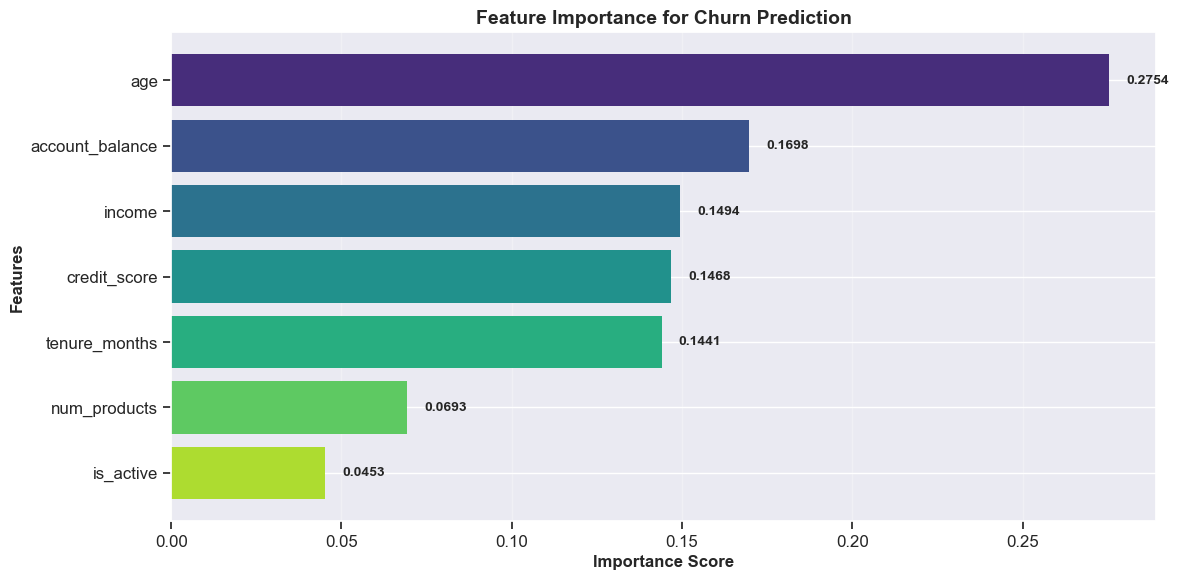


Feature Importance Ranking:
age                       0.2754
account_balance           0.1698
income                    0.1494
credit_score              0.1468
tenure_months             0.1441
num_products              0.0693
is_active                 0.0453


In [34]:
# Feature importance for target prediction
from sklearn.ensemble import RandomForestClassifier

# Prepare data for quick feature importance check
X = df[numerical_cols].fillna(df[numerical_cols].median())
y = df['churned']

# Train a quick random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X, y)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': numerical_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], 
                color=sns.color_palette("viridis", len(feature_importance)))
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Importance for Churn Prediction', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (idx, row) in enumerate(feature_importance.iterrows()):
    plt.text(row['Importance'] + 0.005, i, f"{row['Importance']:.4f}", 
             va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nFeature Importance Ranking:")
print("="*70)
for idx, row in feature_importance.iterrows():
    print(f"{row['Feature']:<25} {row['Importance']:.4f}")


### Let's Understand Which Features Does Our Model Care About Most?

Alright, future data scientists! You've just generated this **Feature Importance bar chart**, and I know what you're thinking: *"This looks like a ranking, but what does 'importance' really mean here, and how can use this to build better models?"*

You're asking exactly the right questions! This plot is an incredibly valuable tool for **multivariate analysis**, as it helps us understand which features our model considers most influential in predicting our target variable (churn). It's like getting a report card for each feature, telling us how much it contributes to the model's decision-making!

Let's break down what this insightful graph is saying and why these findings are absolutely crucial for building robust and interpretable machine learning models.

---

#### **What This Graph Represents (and What It's Telling Us!)**

This plot is a **horizontal bar chart** titled "Feature Importance for Churn Prediction."

*   **Y-axis (Features)**: Lists the individual features from our dataset (e.g., `age`, `account_balance`, `income`, etc.).
*   **X-axis (Importance Score)**: Represents the relative contribution of each feature to the model's predictive power. A higher score means the feature had a greater impact on predicting churn.
*   **Bars**: Each bar's length visually corresponds to its importance score, making it easy to compare features at a glance.
*   **Numerical Labels**: The exact importance score is displayed next to each bar, providing precise values for comparison.
*   **Color Gradient**: The bars are colored using a gradient (from dark purple to yellow-green), which often helps to visually reinforce the ranking, with darker colors typically indicating higher importance.

#### **Key Insights from the Feature Importance Plot**

Let's look at the specific stories these bars are telling us:

*   **`age` is the Dominant Predictor**: With an importance score of **0.2754**, `age` stands out as the single most important feature for predicting churn. This suggests that a customer's age plays a significant role in their likelihood to churn.
*   **Top Tier Features**: `account_balance` (0.1698) follows `age` as the second most important feature.
*   **Middle Tier Features**: `income` (0.1494), `credit_score` (0.1468), and `tenure_months` (0.1441) form a cluster of features with similar, moderately high importance. Their scores are quite close, indicating they all contribute meaningfully to churn prediction.
*   **Lower Tier Features**: `num_products` (0.0693) and `is_active` (0.0453) have considerably lower importance scores. `is_active` is the least important feature in this set.

#### **Why These Insights Matter for Your ML Journey**

Understanding feature importance is a cornerstone of effective machine learning. Here's why these findings are so valuable:

*   **Feature Selection & Dimensionality Reduction**:
    *   **Focus on the Strongest**: Features like `age` and `account_balance` are clearly critical. We should ensure these features are well-engineered and free of errors.
    *   **Consider Removing Weak Features**: Features with very low importance (like `is_active`) might be candidates for removal, especially in larger datasets. Removing them can:
        *   Simplify the model.
        *   Reduce training time.
        *   Potentially prevent overfitting (if the low-importance features are just noise).
        *   Improve model interpretability.
*   **Model Interpretability & Explainability**:
    *   **"Why did the model predict that?"**: Knowing `age` is most important helps us explain *why* a model might predict churn for a particular customer. For example, "This customer is likely to churn because they are in an age bracket historically prone to churn."
    *   **Business Insights**: These insights are gold for business stakeholders. If `age` is a key driver, the business might develop targeted retention strategies for specific age groups. If `is_active` isn't important, perhaps the business needs to redefine what "active" means or how it's measured.
*   **Feature Engineering Guidance**:
    *   **Enhance Important Features**: Can we create new features from `age` (e.g., age groups, age squared) or `account_balance` that might capture even more predictive power?
    *   **Re-evaluate Weak Features**: If `is_active` is unexpectedly low, it might indicate that the feature itself isn't well-defined or doesn't capture the intended information. This could prompt a re-evaluation of how that data is collected or engineered.
*   **Avoiding Multicollinearity (Indirectly)**: While not directly shown here, if two highly correlated features both show high importance, it might suggest that one is redundant. Feature importance helps prioritize which one to keep or how to combine them.

---

**In essence, this plot is your model's way of telling you which pieces of information it found most useful. Pay close attention to these signals – they guide your next steps in refining your dataset and building more powerful, understandable models!**

### **5. Advanced EDA Techniques**

Let's explore some advanced visualization and analysis techniques that provide deeper insights.


Testing for Normal Distribution (Shapiro-Wilk Test):
H0: Data is normally distributed
If p-value < 0.05, reject H0 (data is NOT normally distributed)

age                       | p-value: 0.000000 | Normal? NO
income                    | p-value: 0.000000 | Normal? NO
credit_score              | p-value: 0.000201 | Normal? NO
account_balance           | p-value: 0.000000 | Normal? NO


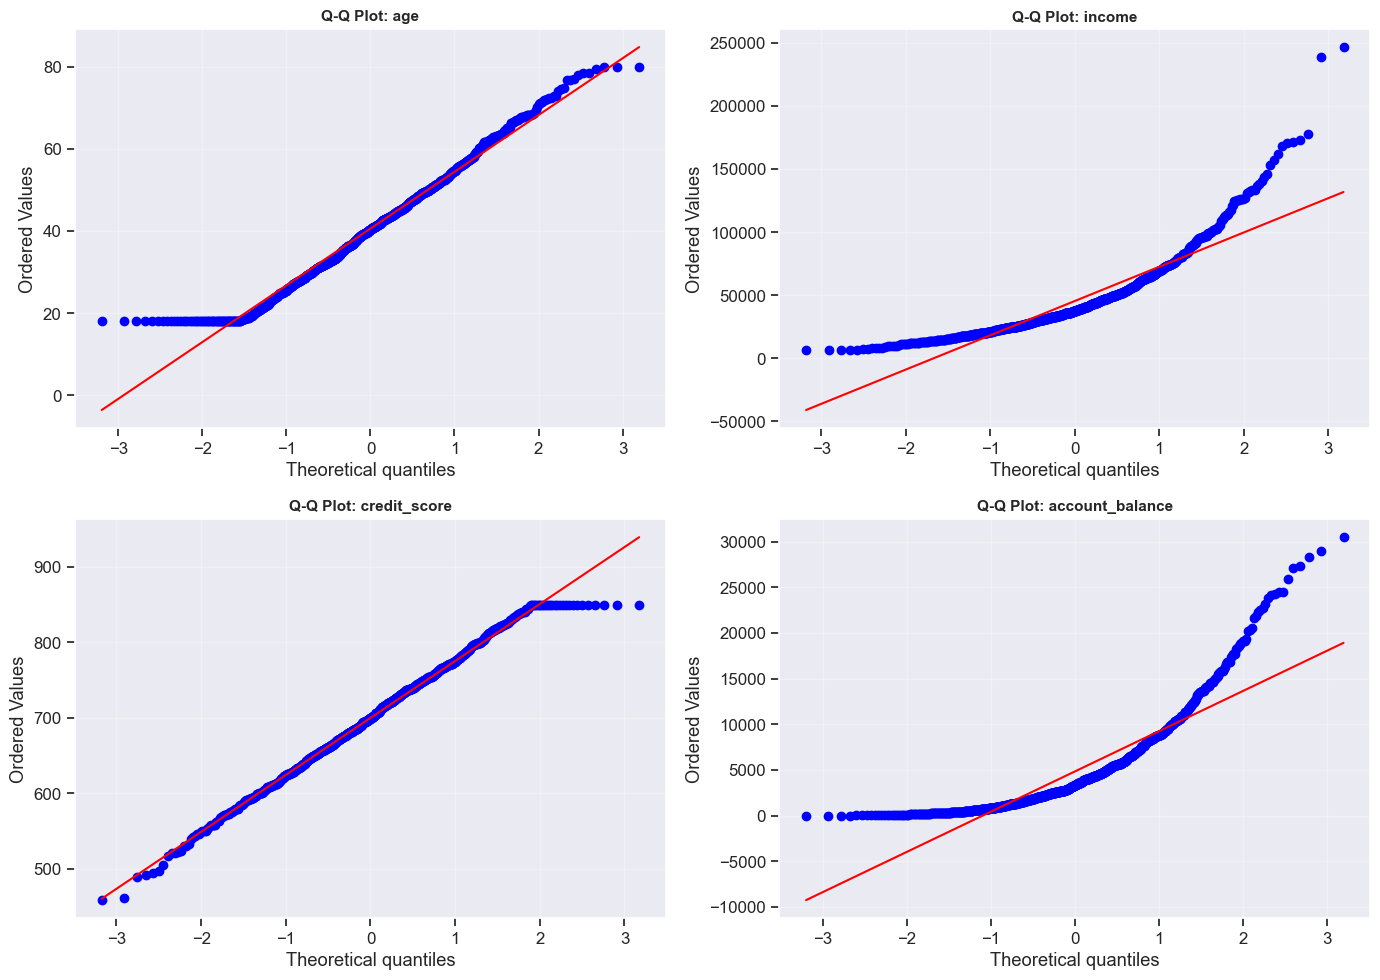

In [35]:
# Distribution Normality Testing
print("Testing for Normal Distribution (Shapiro-Wilk Test):")
print("="*70)
print("H0: Data is normally distributed")
print("If p-value < 0.05, reject H0 (data is NOT normally distributed)\n")

for col in numerical_cols[:4]:  # Test first 4 features
    data_clean = df[col].dropna()
    
    # Shapiro-Wilk test
    stat, p_value = stats.shapiro(data_clean.sample(min(len(data_clean), 5000)))  # Sample for large datasets
    
    is_normal = "YES" if p_value > 0.05 else "NO"
    print(f"{col:<25} | p-value: {p_value:.6f} | Normal? {is_normal}")

# Visualize Q-Q plots for normality check
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:4]):
    stats.probplot(df[col].dropna(), dist="norm", plot=axes[idx])
    axes[idx].set_title(f'Q-Q Plot: {col}', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Let's Have a Look What Above Plots Are 

Alright, future data scientists! You've just generated these fascinating **Q-Q (Quantile-Quantile) plots**, and I know what you're thinking: *"These look a bit abstract compared to histograms and box plots. What exactly are these lines and dots trying to tell me about my data?"*

Don't worry – you're not alone! Q-Q plots are incredibly powerful tools for **assessing the normality of a distribution**, which is a crucial assumption for many statistical tests and machine learning models. They help us understand if our data truly resembles a bell curve or if it has some interesting quirks.

Let's break down what these plots are saying and why these insights are absolutely crucial for preparing your data for robust machine learning models!

---

#### **What Each Q-Q Plot Represents (and What It's Telling Us!)**

Each plot is a **Q-Q plot**, specifically comparing the quantiles of our feature's distribution against the quantiles of a theoretical normal distribution.

-   **Red Line (Reference Line)**: This diagonal line represents what a perfectly normal distribution would look like. If our data were perfectly normal, all the blue dots would fall exactly on this red line.
-   **Blue Dots (Data Quantiles)**: These points represent the actual quantiles of our feature's data.
-   **X-axis**: Theoretical quantiles (what we'd expect from a normal distribution).
-   **Y-axis**: Ordered values (the actual quantiles from our dataset).

**The closer the blue dots hug the red line, the more normally distributed our data is.** Deviations from the line tell us about skewness, heavy/light tails, or other distributional anomalies.

Let's look at each plot:

1.  **Q-Q Plot: `age`**
    *   **What it shows:** The blue dots generally follow the red line in the middle, but they flatten out at the lower end (around 18-20) and slightly curve off at the higher end (around 80).
    *   **Key Insight:** This suggests that while `age` is somewhat normally distributed in its central range, it's **clipped** at the lower and upper bounds (18 and 80). This is common in real-world data where values are constrained.
    *   **Why it matters:** The clipping means the distribution isn't perfectly normal. For models sensitive to normality, this might require careful handling or transformations, or simply acknowledging the data's natural boundaries.

2.  **Q-Q Plot: `income`**
    *   **What it shows:** The blue dots start below the red line, then follow it briefly, and then curve sharply upwards at the higher end.
    *   **Key Insight:** This is a classic pattern for a **right-skewed distribution**. The long tail of higher income values pulls the distribution to the right, indicating that most people have lower incomes, with a few having very high incomes.
    *   **Why it matters:** Highly skewed data can negatively impact models that assume symmetry (like linear regression). A common preprocessing step for right-skewed data like `income` is to apply a **logarithmic transformation** to make it more symmetrical and closer to normal.

3.  **Q-Q Plot: `credit_score`**
    *   **What it shows:** The blue dots follow the red line quite closely in the middle, but flatten out at the higher end (around 850) and slightly at the lower end (around 300).
    *   **Key Insight:** Similar to `age`, `credit_score` appears somewhat normally distributed in its core, but it also shows signs of **clipping** at its natural minimum (300) and maximum (850) values.
    *   **Why it matters:** The clipping indicates boundaries. While the central tendency is normal, the tails are cut off. This might not require aggressive transformation but is important to note if you're using models that are sensitive to extreme values or assume unbounded distributions.

4.  **Q-Q Plot: `account_balance`**
    *   **What it shows:** The blue dots start significantly below the red line, then follow it for a very short segment, and then curve very sharply upwards at the higher end.
    *   **Key Insight:** This plot shows a **very strong right-skewness**, even more pronounced than `income`. This is characteristic of an exponential-like distribution, where many customers have low balances, and a few have very high balances.
    *   **Why it matters:** Extreme skewness like this can severely impact model performance. Features like `account_balance` are prime candidates for **logarithmic or power transformations** to reduce skewness and make the data more amenable to various machine learning algorithms.

---

#### **Why These Insights Matter for Data Science and ML**

Understanding the normality (or lack thereof) of your features using Q-Q plots is incredibly important:

*   **Model Assumptions:** Many statistical models (e.g., Linear Regression, ANOVA) and some machine learning algorithms (e.g., Gaussian Naive Bayes) assume that input features are normally distributed. Violating these assumptions can lead to inaccurate results or reduced model performance.
*   **Preprocessing Decisions:** Q-Q plots directly inform your preprocessing strategy.
    *   **Skewed Data:** If a feature is highly skewed (like `income` or `account_balance`), you might apply transformations (e.g., `np.log()`, `np.sqrt()`, `Box-Cox`) to make it more symmetrical. This often helps models learn patterns more effectively.
    *   **Clipped Data:** For features like `age` or `credit_score` with natural bounds, you might decide against aggressive transformations or consider robust scaling methods.
*   **Outlier Detection:** Deviations at the extreme ends of the Q-Q plot can also highlight potential outliers that might need further investigation or special handling.
*   **Feature Engineering:** Knowing a feature's distribution can inspire new feature ideas. For example, if `income` is log-normal, perhaps `log_income` is a more predictive feature.
*   **Scaling:** While not directly shown, understanding distribution helps choose appropriate scaling methods (e.g., `StandardScaler` assumes normal-like data, `MinMaxScaler` is less sensitive to distribution shape).

By carefully examining these Q-Q plots, you're not just looking at pretty graphs; you're gaining critical intelligence about your data's underlying structure, which is a superpower for any aspiring machine learning engineer!

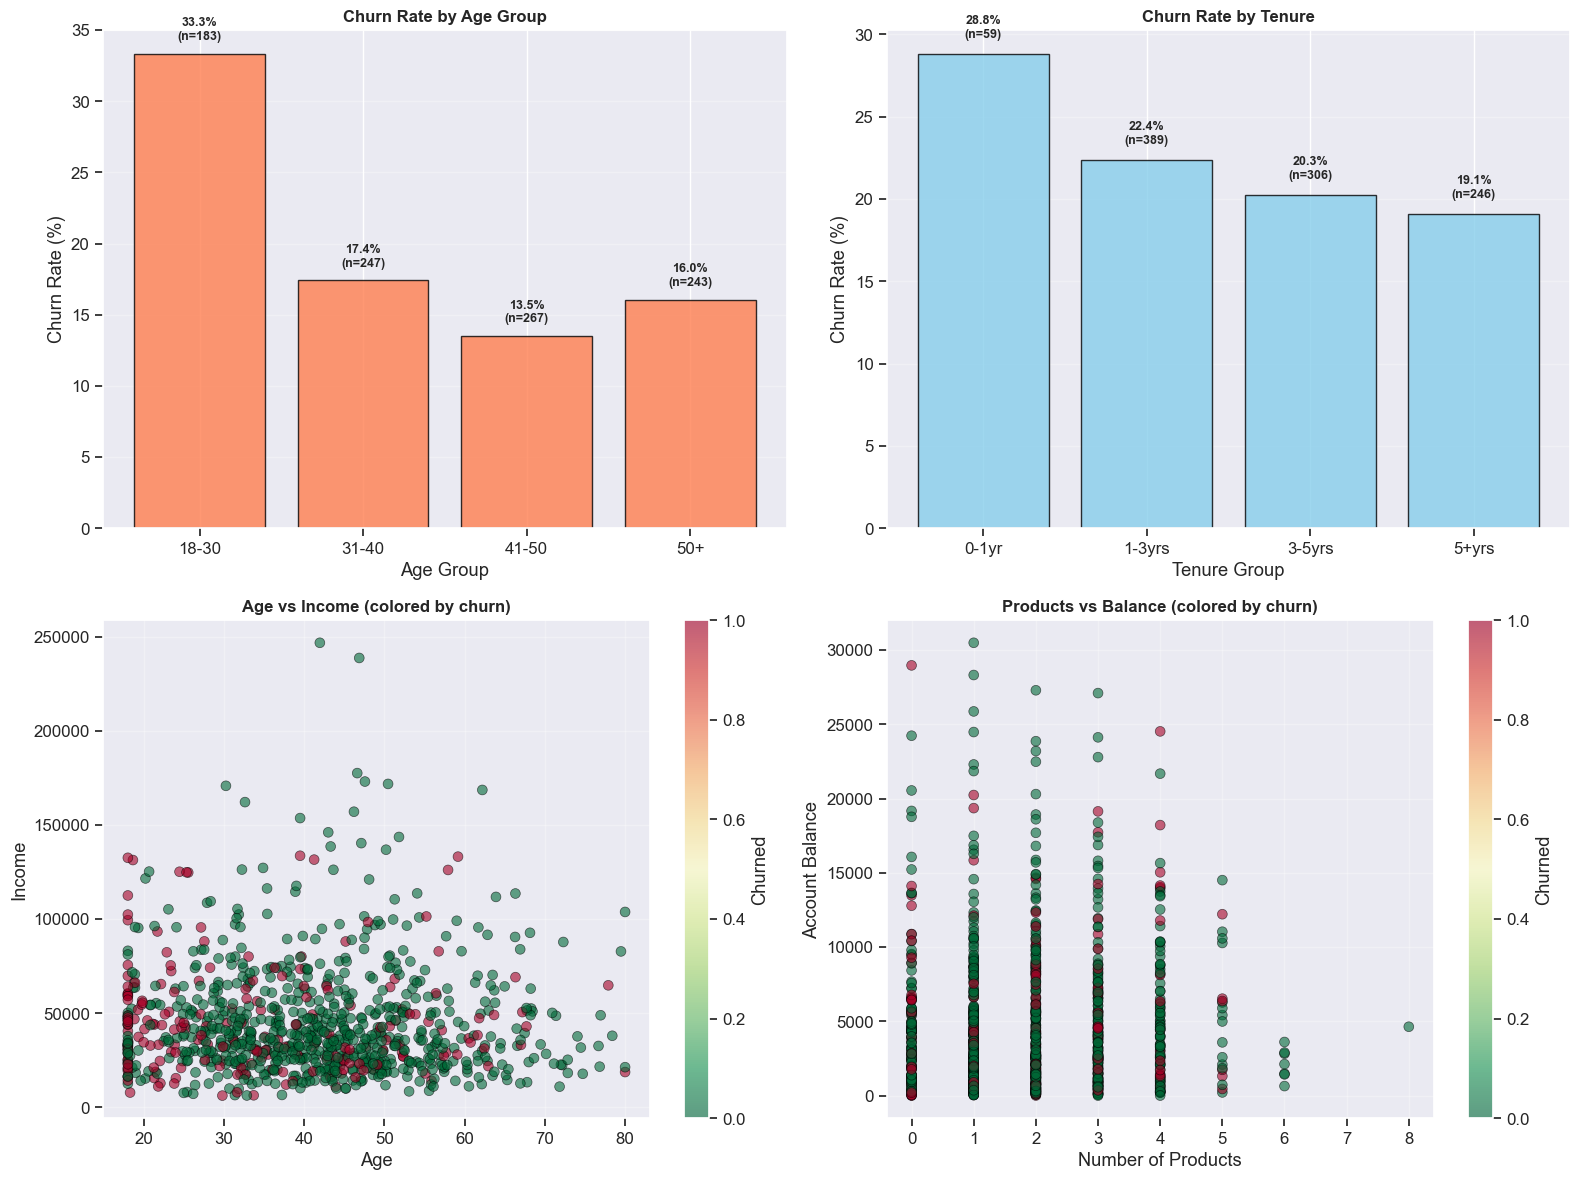

In [36]:
# Time-based or segment analysis
# Analyze churn patterns across different customer segments

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Churn rate by age groups
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 80], labels=['18-30', '31-40', '41-50', '50+'])
age_churn = df.groupby('age_group')['churned'].agg(['mean', 'count']).reset_index()

axes[0, 0].bar(age_churn['age_group'].astype(str), age_churn['mean'] * 100, 
               color='coral', alpha=0.8, edgecolor='black')
axes[0, 0].set_title('Churn Rate by Age Group', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Churn Rate (%)')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].grid(True, alpha=0.3, axis='y')

for i, (idx, row) in enumerate(age_churn.iterrows()):
    axes[0, 0].text(i, row['mean']*100 + 1, f"{row['mean']*100:.1f}%\n(n={row['count']})", 
                    ha='center', fontsize=9, fontweight='bold')

# 2. Churn rate by tenure groups
df['tenure_group'] = pd.cut(df['tenure_months'], bins=[0, 12, 36, 60, 120], 
                             labels=['0-1yr', '1-3yrs', '3-5yrs', '5+yrs'])
tenure_churn = df.groupby('tenure_group')['churned'].agg(['mean', 'count']).reset_index()

axes[0, 1].bar(tenure_churn['tenure_group'].astype(str), tenure_churn['mean'] * 100, 
               color='skyblue', alpha=0.8, edgecolor='black')
axes[0, 1].set_title('Churn Rate by Tenure', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Churn Rate (%)')
axes[0, 1].set_xlabel('Tenure Group')
axes[0, 1].grid(True, alpha=0.3, axis='y')

for i, (idx, row) in enumerate(tenure_churn.iterrows()):
    axes[0, 1].text(i, row['mean']*100 + 1, f"{row['mean']*100:.1f}%\n(n={row['count']})", 
                    ha='center', fontsize=9, fontweight='bold')

# 3. Income vs Age scatter with churn coloring
scatter = axes[1, 0].scatter(df['age'], df['income'], c=df['churned'], 
                             cmap='RdYlGn_r', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1, 0].set_title('Age vs Income (colored by churn)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Income')
axes[1, 0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 0], label='Churned')

# 4. Product usage vs Balance with churn patterns
scatter = axes[1, 1].scatter(df['num_products'], df['account_balance'], 
                             c=df['churned'], cmap='RdYlGn_r', alpha=0.6, s=50, 
                             edgecolors='black', linewidth=0.5)
axes[1, 1].set_title('Products vs Balance (colored by churn)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Number of Products')
axes[1, 1].set_ylabel('Account Balance')
axes[1, 1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 1], label='Churned')

plt.tight_layout()
plt.show()


### Advanced EDA - Segment Analysis and Feature Interactions

Alright, future data scientists! You've just generated these four insightful plots, and I know what you're thinking: *"These look like they're telling a more complex story than just single features. How do I piece together these different views to get a complete picture of our customers?"*

Don't worry – you're not alone! These plots are fantastic examples of **advanced EDA**, where we move beyond individual features to understand how different customer segments behave and how multiple features interact to influence churn. It's like zooming in on specific groups of customers to understand their unique characteristics!

Let's break down what these plots are saying and why these insights are absolutely crucial for building targeted strategies and powerful machine learning models.

---

#### **1. Churn Rate by Age Group (Top-Left Bar Chart)**

*   **What it Represents**: This bar chart shows the percentage of customers who churned within different age brackets (18-30, 31-40, 41-50, 50+). Each bar also indicates the number of customers (`n=`) in that age group.
*   **Key Insights**:
    *   **Younger Customers Churn More**: The `18-30` age group has the highest churn rate at **33.3%**. This is a significant finding!
    *   **Churn Decreases with Age (Initially)**: The churn rate drops considerably for `31-40` (17.4%) and `41-50` (13.5%).
    *   **Slight Increase in Older Group**: For customers `50+`, the churn rate slightly increases to `16.0%` but remains lower than the youngest group.
*   **Why it Matters for ML**:
    *   **Strong Predictor**: Age group is clearly a strong predictor of churn. Your model will likely leverage this heavily.
    *   **Targeted Strategies**: This insight is gold for business. You might recommend specific retention campaigns or product offerings tailored to younger customers.
    *   **Feature Engineering**: You could consider creating age-based features or interaction terms (e.g., `age_group_18_30 * num_products`) to capture these patterns.

#### **2. Churn Rate by Tenure (Top-Right Bar Chart)**

*   **What it Represents**: This bar chart illustrates the churn rate based on how long a customer has been with the service (their 'tenure'). The tenure groups are `0-1yr`, `1-3yrs`, `3-5yrs`, and `5+yrs`.
*   **Key Insights**:
    *   **New Customers are Risky**: The `0-1yr` tenure group has the highest churn rate at **28.8%**. This is a common pattern in many businesses – new customers are often testing the waters.
    *   **Loyalty Builds Over Time**: As tenure increases, the churn rate generally decreases, reaching its lowest at `19.1%` for customers with `5+yrs` tenure.
*   **Why it Matters for ML**:
    *   **Critical Feature**: Tenure is another highly influential feature for predicting churn.
    *   **Early Intervention**: Businesses can use this to focus retention efforts on new customers, perhaps with onboarding programs or special offers during their first year.
    *   **Feature Engineering**: Similar to age, tenure groups can be used directly or combined with other features to create more powerful predictors.

#### **3. Age vs Income (Colored by Churn) (Bottom-Left Scatter Plot)**

*   **What it Represents**: This scatter plot visualizes the relationship between `Age` (x-axis) and `Income` (y-axis), with each point colored by whether the customer `churned` (red) or `not churned` (green).
*   **Key Insights**:
    *   **No Obvious Linear Relationship**: There isn't a clear linear trend between age and income across the entire dataset.
    *   **Churn Distribution**: Churned customers (red dots) are scattered across various age and income levels. However, there might be a slight visual indication of more red dots in the lower-income ranges, especially for younger ages, though it's not a definitive cluster.
    *   **Density of Customers**: Most customers fall within the age range of 20-60 and income range of 25,000-100,000.
*   **Why it Matters for ML**:
    *   **Interaction Potential**: While `Age` and `Income` might not have a strong direct linear relationship with each other, their *combined effect* or their individual effects on churn are still important.
    *   **Segmentation**: This plot helps confirm that churn isn't strictly confined to one age-income bracket, suggesting that other features are also at play.
    *   **Feature Engineering**: You might consider creating interaction features like `age * income` or binning income to see if specific income tiers have different churn behaviors within age groups.

#### **4. Products vs Balance (Colored by Churn) (Bottom-Right Scatter Plot)**

*   **What it Represents**: This scatter plot shows the `Number of Products` a customer has (x-axis) against their `Account Balance` (y-axis), again colored by `churned` (red) or `not churned` (green).
*   **Key Insights**:
    *   **Product Usage Distribution**: Most customers have between 0 and 4 products. There are fewer customers with 5 or more products.
    *   **Churn and Product Count**: Churned customers (red dots) appear more frequently among those with **fewer products (0-2)**. As the number of products increases, the proportion of churned customers seems to decrease.
    *   **Churn and Account Balance**: Churned customers also seem to be more concentrated at **lower account balances**. Customers with higher balances (e.g., above 15,000-20,000) tend to have fewer red dots.
    *   **Combined Effect**: Customers with both a low number of products AND a low account balance appear to be at a higher risk of churning.
*   **Why it Matters for ML**:
    *   **Strong Predictors**: Both `num_products` and `account_balance` are likely strong indicators of customer engagement and satisfaction, and thus, churn.
    *   **Feature Engineering**: This plot screams for potential feature engineering!
        *   You could create a `products_per_balance` ratio.
        *   Bin `num_products` into categories like 'low', 'medium', 'high'.
        *   Create an interaction feature like `low_products_low_balance_flag`.
    *   **Business Strategy**: This suggests that encouraging customers to use more products or increase their balance could be effective retention strategies.

---

### **Why These Advanced Insights are Crucial**

These plots move us beyond just understanding individual features to seeing how they interact and how different customer segments behave. This is vital because:

*   **Better Feature Engineering**: You can create more powerful features by combining or transforming existing ones based on these observed interactions (e.g., `age_group`, `tenure_group`, `product_balance_ratio`).
*   **Improved Model Performance**: Models that understand these complex relationships will make more accurate predictions.
*   **Targeted Business Actions**: These insights directly inform business decisions, allowing for highly specific and effective interventions (e.g., "target young customers with low tenure and few products").
*   **Deeper Understanding**: You gain a much richer, more nuanced understanding of your customer base, which is the ultimate goal of EDA!

Keep up the great work! You're not just looking at graphs; you're uncovering the hidden stories within your data!

### 6. EDA Summary Report

Let's create a comprehensive summary of our findings to guide model development.


In [44]:
print("="*70)
print("COMPREHENSIVE EDA SUMMARY REPORT")
print("="*70)

print("\nDATASET OVERVIEW")
print("-" * 70)
print(f"• Total Records: {len(df):,}")
print(f"• Features: {df.shape[1]} ({len(numerical_cols)} numerical, {len(categorical_cols)} categorical)")
print(f"• Target Variable: churned (Churn Rate: {df['churned'].mean():.2%})")
print(f"• Missing Data: {df.isnull().sum().sum()} values ({df.isnull().sum().sum()/(len(df)*df.shape[1])*100:.2f}%)")

print("\nKEY FINDINGS")
print("-" * 70)

# Most important features
top_features = feature_importance.head(3)
print("\n1. Most Predictive Features:")
for idx, row in top_features.iterrows():
    print(f"   • {row['Feature']}: {row['Importance']:.4f}")

# Distribution insights
print("\n2. Distribution Insights:")
skewed_features = []
for col in numerical_cols:
    skewness = df[col].skew()
    if abs(skewness) > 1:
        skewed_features.append(f"{col} (skew: {skewness:.2f})")

if skewed_features:
    print("   Highly skewed features (consider transformation):")
    for feature in skewed_features:
        print(f"   • {feature}")
else:
    print("   • No highly skewed features detected")

# Outliers
print("\n3. Outlier Detection:")
for col in numerical_cols[:3]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = len(df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)])
    outlier_pct = outlier_count / len(df) * 100
    print(f"   • {col}: {outlier_count} outliers ({outlier_pct:.1f}%)")

# Categorical insights
print("\n4. Categorical Feature Insights:")
for col in categorical_cols:
    print(f"   • {col}: {df[col].nunique()} categories")
    top_category = df[col].value_counts().index[0]
    top_pct = df[col].value_counts().values[0] / len(df) * 100
    print(f"     - Most common: {top_category} ({top_pct:.1f}%)")

print("\nDATA QUALITY ISSUES")
print("-" * 70)
issues = []

# Check for missing values
if df.isnull().sum().sum() > 0:
    issues.append("Missing values detected in: " + ", ".join(df.columns[df.isnull().sum() > 0].tolist()))

# Check for duplicates
if df.duplicated().sum() > 0:
    issues.append(f"{df.duplicated().sum()} duplicate rows found")

# Check for constant features
constant_features = [col for col in df.columns if df[col].nunique() == 1]
if constant_features:
    issues.append(f"Constant features: {', '.join(constant_features)}")

if issues:
    for i, issue in enumerate(issues, 1):
        print(f"{i}. {issue}")
else:
    print("No major data quality issues detected!")

print("\nRECOMMENDATIONS FOR MODEL BUILDING")
print("-" * 70)
print("1. Feature Engineering:")
print("   • Consider creating interaction features between top predictors")
print("   • Transform skewed features using log or box-cox transformation")
print("   • Create binned versions of continuous features for interpretability")

print("\n2. Preprocessing Requirements:")
print("   • Handle missing values (imputation strategy needed)")
print("   • Scale numerical features (StandardScaler or MinMaxScaler)")
print("   • Encode categorical features (One-Hot or Label Encoding)")

print("\n3. Model Selection Guidance:")
if any(abs(df[col].corr(df['churned'])) > 0.3 for col in numerical_cols):
    print("   • Strong linear relationships detected → Try Logistic Regression first")
print("   • Complex patterns observed → Tree-based models (Random Forest, XGBoost)")
print("   • Consider ensemble methods for best performance")

print("\n4. Validation Strategy:")
print("   • Use stratified cross-validation (maintain churn rate balance)")
print("   • Monitor both accuracy and F1-score (imbalanced target)")
print("   • Consider SMOTE for handling class imbalance if needed")

print("\n" + "="*70)
print("EDA COMPLETE - Ready to build ML models!")
print("="*70)


COMPREHENSIVE EDA SUMMARY REPORT

DATASET OVERVIEW
----------------------------------------------------------------------
• Total Records: 1,000
• Features: 13 (7 numerical, 2 categorical)
• Target Variable: churned (Churn Rate: 21.30%)
• Missing Data: 203 values (1.56%)

KEY FINDINGS
----------------------------------------------------------------------

1. Most Predictive Features:
   • age: 0.2754
   • account_balance: 0.1698
   • income: 0.1494

2. Distribution Insights:
   Highly skewed features (consider transformation):
   • income (skew: 1.99)
   • account_balance (skew: 1.92)

3. Outlier Detection:
   • age: 4 outliers (0.4%)
   • income: 44 outliers (4.4%)
   • credit_score: 4 outliers (0.4%)

4. Categorical Feature Insights:
   • region: 4 categories
     - Most common: North (28.7%)
   • customer_type: 3 categories
     - Most common: Standard (56.5%)

DATA QUALITY ISSUES
----------------------------------------------------------------------
1. Missing values detected in: i

## Hands-on Exercises

Now it's your turn to practice EDA skills! Complete these exercises to reinforce your learning.


### Exercise 1: Complete Univariate Analysis

**Task**: Perform a comprehensive univariate analysis on a new dataset.

**Hints**:
- Load a dataset from sklearn or create your own
- Analyze each feature's distribution
- Identify skewness and outliers
- Create appropriate visualizations


In [38]:
# TODO: Exercise 1 - Complete Univariate Analysis
# Starter code:

from sklearn.datasets import load_wine
# wine_data = load_wine(as_frame=True)
# wine_df = wine_data.frame

# Your code here:
# 1. Examine the first few rows
# 2. Check data types and missing values
# 3. Create distribution plots for each feature
# 4. Calculate and interpret skewness and kurtosis
# 5. Identify and visualize outliers


### Exercise 2: Bivariate Relationship Analysis

**Task**: Explore relationships between features and identify interesting patterns.

**Hints**:
- Use scatter plots for numerical vs numerical
- Use box plots for categorical vs numerical
- Calculate and interpret correlation coefficients
- Test for statistical significance


In [39]:
# TODO: Exercise 2 - Bivariate Analysis
# Your code here:

# 1. Create scatter plots to explore relationships
# 2. Calculate correlation matrix
# 3. Identify the strongest relationships
# 4. Create visualizations for categorical vs numerical relationships
# 5. Perform statistical tests (t-test, chi-square)


### Exercise 3: Feature Engineering from EDA Insights

**Task**: Use insights from EDA to create new features that could improve model performance.

**Hints**:
- Create binned versions of continuous variables
- Generate interaction features
- Apply transformations to skewed features
- Create domain-specific features


In [40]:
# TODO: Exercise 3 - Feature Engineering
# Your code here:

# Example: Create income-to-balance ratio
# df['income_balance_ratio'] = df['income'] / (df['account_balance'] + 1)

# 1. Create at least 3 new features based on EDA insights
# 2. Apply log transformation to skewed features
# 3. Create binned categorical versions of continuous features
# 4. Generate interaction features between important predictors
# 5. Compare the predictive power of new features vs original


### Exercise 4: Build an Automated EDA Function

**Task**: Create a reusable function that automates the EDA process for any dataset.

**Hints**:
- Function should accept a DataFrame and target column
- Generate comprehensive visualizations
- Calculate key statistics
- Return a summary report


In [41]:
# TODO: Exercise 4 - Automated EDA Function
# Your code here:

def automated_eda(df, target_column=None):
    """
    Performs comprehensive EDA on a given DataFrame
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataset to analyze
    target_column : str, optional
        Name of the target variable for supervised learning
    
    Returns:
    --------
    dict : Dictionary containing summary statistics and insights
    """
    # Your implementation here
    pass

# Test your function:
# results = automated_eda(df, target_column='churned')


## Takeaways + Next Steps

### Key Takeaways

**1. EDA is Not Optional**
- EDA is the foundation of successful ML projects
- Investing time in EDA saves hours of debugging bad models
- Understanding your data is more valuable than knowing every algorithm

**2. Systematic Approach Wins**
- Follow a structured framework: univariate → bivariate → multivariate
- Document insights as you go
- Always connect findings back to the business problem

**3. Visualization is Essential**
- A good plot can reveal patterns that statistics miss
- Use multiple visualization types for different perspectives
- Make plots clear and informative, not just pretty

**4. Statistical Rigor Matters**
- Back up visual insights with statistical tests
- Understand p-values and their limitations
- Be cautious about correlation vs causation

**5. EDA Drives Everything**
- Guides preprocessing decisions
- Informs feature engineering
- Influences model selection
- Sets performance expectations

### Common Pitfalls to Avoid

**Data Leakage During EDA**
- Never use test data in EDA
- Always split data first if you're checking model-related statistics
- Be careful with time-series data

**Confirmation Bias**
- Don't just look for patterns you expect to find
- Challenge your assumptions
- Let the data surprise you

**Analysis Paralysis**
- EDA should be thorough but not infinite
- Set a time limit and move to modeling
- You can always return to EDA if models underperform

**Ignoring Domain Knowledge**
- Statistical patterns without context can mislead
- Consult domain experts
- Validate findings against business logic

### Best Practices Checklist

Before moving to model building, ensure you've:

- [ ] Checked data types and converted as needed
- [ ] Identified and handled missing values
- [ ] Detected and investigated outliers
- [ ] Analyzed feature distributions
- [ ] Examined feature-target relationships
- [ ] Calculated correlations and multicollinearity
- [ ] Tested statistical significance
- [ ] Documented insights and actionable findings
- [ ] Created a preprocessing plan
- [ ] Identified features for engineering

### Tools Beyond This Notebook

**Automated EDA Libraries:**
- **Pandas Profiling**: Comprehensive HTML reports
- **Sweetviz**: Beautiful comparative analysis
- **DataPrep**: Fast and flexible EDA
- **D-Tale**: Interactive visual analysis

**Advanced Visualization:**
- **Plotly**: Interactive plots
- **Altair**: Declarative visualization
- **Bokeh**: Interactive dashboards

**Statistical Analysis:**
- **Scipy**: Advanced statistical tests
- **Statsmodels**: Comprehensive statistical modeling
- **Pingouin**: User-friendly statistics

### Next Steps

**1. Practice with Real Datasets**
- Kaggle datasets with different characteristics
- UCI Machine Learning Repository
- Government open data portals
- Industry-specific datasets

**2. Build Your EDA Toolkit**
- Create reusable functions and templates
- Develop a personal EDA checklist
- Build visualization templates

**3. Learn Domain-Specific EDA**
- Time series analysis techniques
- Image data exploration
- Text data EDA
- Graph/network analysis

**4. Study Advanced Topics**
- Dimensionality reduction (PCA, t-SNE, UMAP)
- Clustering for pattern discovery
- Anomaly detection methods
- Causal inference basics

### Further Learning Resources

**Books:**
- "Exploratory Data Analysis" by John Tukey (classic)
- "The Art of Data Science" by Peng & Matsui
- "Practical Statistics for Data Scientists" by Bruce & Bruce

**Online Courses:**
- Coursera: "Data Visualization with Python"
- DataCamp: "Exploratory Data Analysis in Python"
- Fast.ai: "Practical Deep Learning" (includes great EDA sections)

**Documentation & Guides:**
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)
- [Matplotlib Gallery](https://matplotlib.org/stable/gallery/)

**Communities:**
- Kaggle Discussions & Notebooks
- r/datascience on Reddit
- Stack Overflow [pandas] tag

### Tomorrow's Preview

**Day 4: ML Pipeline with Scikit-learn** - We'll take everything we've learned about data preprocessing and EDA and build a complete, production-ready machine learning pipeline using scikit-learn's powerful pipeline tools.

---

**Remember**: "In God we trust. All others must bring data." - W. Edwards Deming

**But also**: "The data will set you free... after you've spent weeks understanding it!" - Every Data Scientist Ever

Good EDA is like good detective work - it's about asking the right questions, following the evidence, and being open to where the data leads you. Master this skill, and you'll be ahead of 80% of aspiring data scientists.

---


## 📫 Let's Connect
- 💼 **LinkedIn:** [hashirahmed07](https://www.linkedin.com/in/hashirahmed07/)
- 📧 **Email:** [Hashirahmad330@gmail.com](mailto:Hashirahmad330@gmail.com)
- 🐙 **GitHub:** [CodeByHashir](https://github.com/CodeByHashir)